####  <span> <span style="color: blue;"> Udacity Data Scientist Nanodegree </span>
# <span> <span style="color: blue;"> Project 1: The Data Science Process - Boston and Seattle AirBnB Data</span>

This workbook contains the first project of the Udacity Data Scientist Nanodegree. We will use [data for AirBnB locations](http://insideairbnb.com/get-the-data.html)  in Boston and Seattle from 2021. We will use the data to answer some research questions and finally we will build a model for predicting the price of an AirBnB location!

## Preparation

### Import libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Import data

In [10]:
se_listings = pd.read_csv('./seattle/2021_listings_seattle.csv')
bo_listings = pd.read_csv('./airbnb_project/boston/2021_listings_boston.csv')

## Step 1: Business Understanding

The data used for this project contains detailed information about AirBnB listings in Boston and Seattle. In total we have data for 3349 listings in Boston and for 4686 listings in Seattle with 75 columns respectively. The first step is to formulate some research questions for the given data.

In [11]:
print(bo_listings.shape)
print(se_listings.shape)

(3349, 74)
(4686, 74)


### Formulating research questions

After having a first look at the data I identified the following research questions that might be interesting:

Regarding the price we will try to answer the following questions:
* Is the price for a location higher if its located in certain neighborhoods?
* Is the price for a location higher if it has a certain property type?
* Is the price of a location higher if it accomodates more persons?
* Is the price of a location higher if it has more beds/bedrooms?
* Is the price of a location lower if it misses some of the most common amenities?

Regarding the review score of a location we will try to answer the following questions:
* Is the review score of a location higher if the host has a higher response rate?
* Is the review score of a location higher if the host has a higher acceptance rate?
* Is the review score of a location lower if the host is no superhost?
* Is the review score of a location higher if the host has a profile pic?

Additionally we will try to build a prediction model to predict prices for the AirBnB locations.

## Step 2: Data Understanding

In step two we need to get an overview of the data. We will inspect e.g. how many nan values there, which columns the dataset has and how the data is distributed.

### Define helper functions

I used the cell below as a container for functions I used frequently during working with the data.

In [12]:
def nan_perc(df, threshold=None):
    '''
    INPUT:
        df: Any dataframe
        threshold (optional): Any number between 0 and 1
    OUTPUT:
        A sorted dataframe containing the columns names and the percentage of nan's in this column with columns that have an nan percentage greater than threshold
    '''
    na_perc = (np.sum(df.isnull()) / df.shape[0])
    df_columns = df.columns
    df_na_perc = pd.DataFrame({'column': df_columns, 'nan_percentage': na_perc}).reset_index(drop=True).sort_values(by='nan_percentage', ascending=False).reset_index(drop=True)
    if threshold is None:
        return df_na_perc
    else:
        df_na_perc = df_na_perc[df_na_perc.nan_percentage >= threshold].reset_index(drop=True).sort_values(by='nan_percentage', ascending=False).reset_index(drop=True)
        return df_na_perc

def get_numeric(df):
    '''
    INPUT:
        df: Any dataframe
    OUTPUT:
        A dataframe containing the columns of df that are numeric
    '''
    return df.select_dtypes(include='number')

def get_object(df):
    '''
    INPUT:
        df: Any dataframe
    OUTPUT:
        A dataframe containing the columns of df that have the object datatype
    '''
    return df.select_dtypes(include='object')

### Step 2.1: EDA for Boston data

In [13]:
bo_listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20211217003539,2021-12-17,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,...,4.95,4.86,4.90,NaN,f,1,1,0,0,0.27
1,5506,https://www.airbnb.com/rooms/5506,20211217003539,2021-12-17,** Private! Minutes to center!**,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,...,4.89,4.54,4.78,Approved by the government,f,10,10,0,0,0.71
2,6695,https://www.airbnb.com/rooms/6695,20211217003539,2021-12-17,Home Away from Home! Condo,"Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,...,4.95,4.48,4.70,STR446650,f,10,10,0,0,0.77
3,8789,https://www.airbnb.com/rooms/8789,20211217003539,2021-12-17,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,Beacon Hill is a historic neighborhood filled ...,https://a0.muscache.com/pictures/32210/7fdd2fd...,26988,https://www.airbnb.com/users/show/26988,...,4.96,4.96,4.56,NaN,f,6,6,0,0,0.28
4,10730,https://www.airbnb.com/rooms/10730,20211217003539,2021-12-17,Bright 1bed facing Golden Dome,"Bright, spacious unit, new galley kitchen, new...",Beacon Hill is located downtown and is conveni...,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,...,4.92,4.96,4.43,NaN,f,6,6,0,0,0.21


In [14]:
bo_listings.columns # Check columns for the ones that might be interesting for answering our research questions

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [15]:
bo_listings.dtypes # Get overview for datatypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [16]:
nan_perc(bo_listings) # show percentage of nan's in each column

,column,nan_percentage
0,calendar_updated,1.000000
1,bathrooms,1.000000
2,neighbourhood_group_cleansed,1.000000
3,license,0.447895
4,host_about,0.383398
...,...,...
69,price,0.000000
70,amenities,0.000000
71,listing_url,0.000000
72,property_type,0.000000


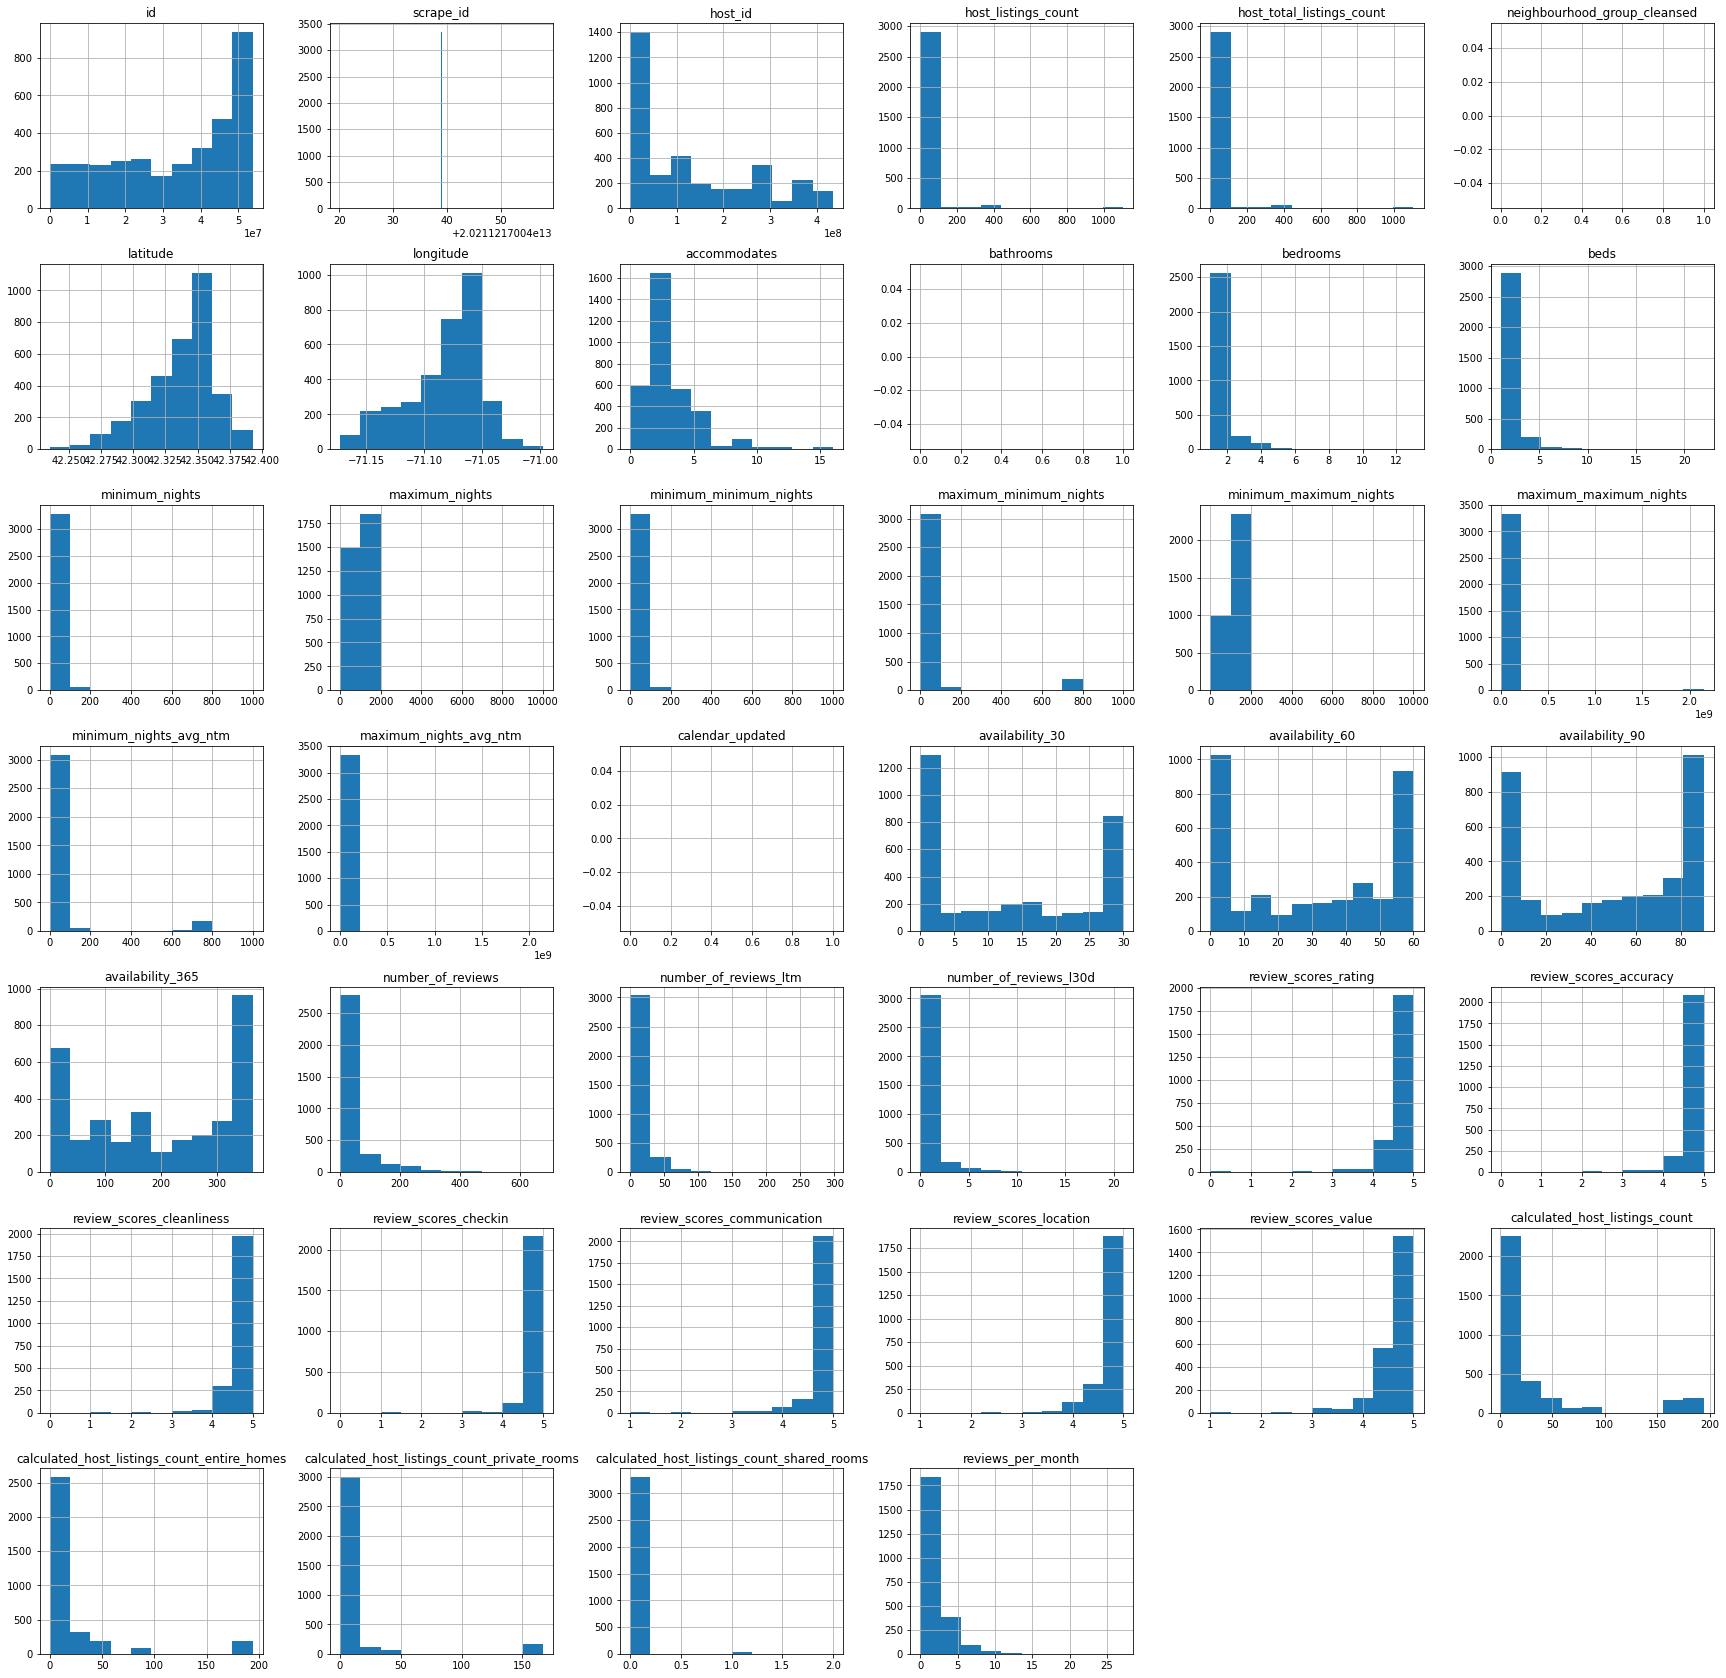

In [17]:
get_numeric(bo_listings).hist(figsize=(30,30)) #Check how the data is distributed
plt.show()

### Step 2.2: EDA for Seattle data

In [18]:
se_listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20211220161321,2021-12-20,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...",Madrona is a hidden gem of a neighborhood. It ...,https://a0.muscache.com/pictures/02973ad3-a7a3...,2536,https://www.airbnb.com/users/show/2536,...,5.00,4.97,4.80,STR-OPLI-19-002837,t,1,1,0,0,0.22
1,6606,https://www.airbnb.com/rooms/6606,20211220161321,2021-12-20,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","A peaceful yet highly accessible neighborhood,...",https://a0.muscache.com/pictures/45742/21116d7...,14942,https://www.airbnb.com/users/show/14942,...,4.76,4.88,4.56,str-opli-19-002622,f,2,2,0,0,1.04
2,9419,https://www.airbnb.com/rooms/9419,20211220161321,2021-12-21,Glorious sun room w/ memory foambed,"Keeping you safe is our priority, we are adher...","Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,https://www.airbnb.com/users/show/30559,...,4.87,4.63,4.61,STR-OPLI-19-003039,f,8,0,8,0,1.11
3,9531,https://www.airbnb.com/rooms/9531,20211220161321,2021-12-20,The Adorable Sweet Orange Craftsman,The Sweet Orange is a delightful and spacious ...,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,https://www.airbnb.com/users/show/31481,...,4.94,4.98,4.89,STR-OPLI-19-002182,f,2,2,0,0,0.45
4,9534,https://www.airbnb.com/rooms/9534,20211220161321,2021-12-20,The Coolest Tangerine Dream MIL!,Welcome to my delicious Tangerine Dream! A co...,The neighborhood is the best of two worlds...w...,https://a0.muscache.com/pictures/30476721/0751...,31481,https://www.airbnb.com/users/show/31481,...,4.98,4.95,4.93,STR-OPLI-19-002182,f,2,2,0,0,0.49


In [19]:
se_listings.columns # Check columns for the ones that might be interesting for answering the research questions

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [20]:
se_listings.dtypes # Get overview for datatypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [21]:
nan_perc(se_listings) # show percentage of nan's in each column

,column,nan_percentage
0,bathrooms,1.000000
1,calendar_updated,1.000000
2,neighborhood_overview,0.271447
3,neighbourhood,0.271447
4,host_about,0.268886
...,...,...
69,minimum_nights,0.000000
70,maximum_nights,0.000000
71,host_verifications,0.000000
72,has_availability,0.000000


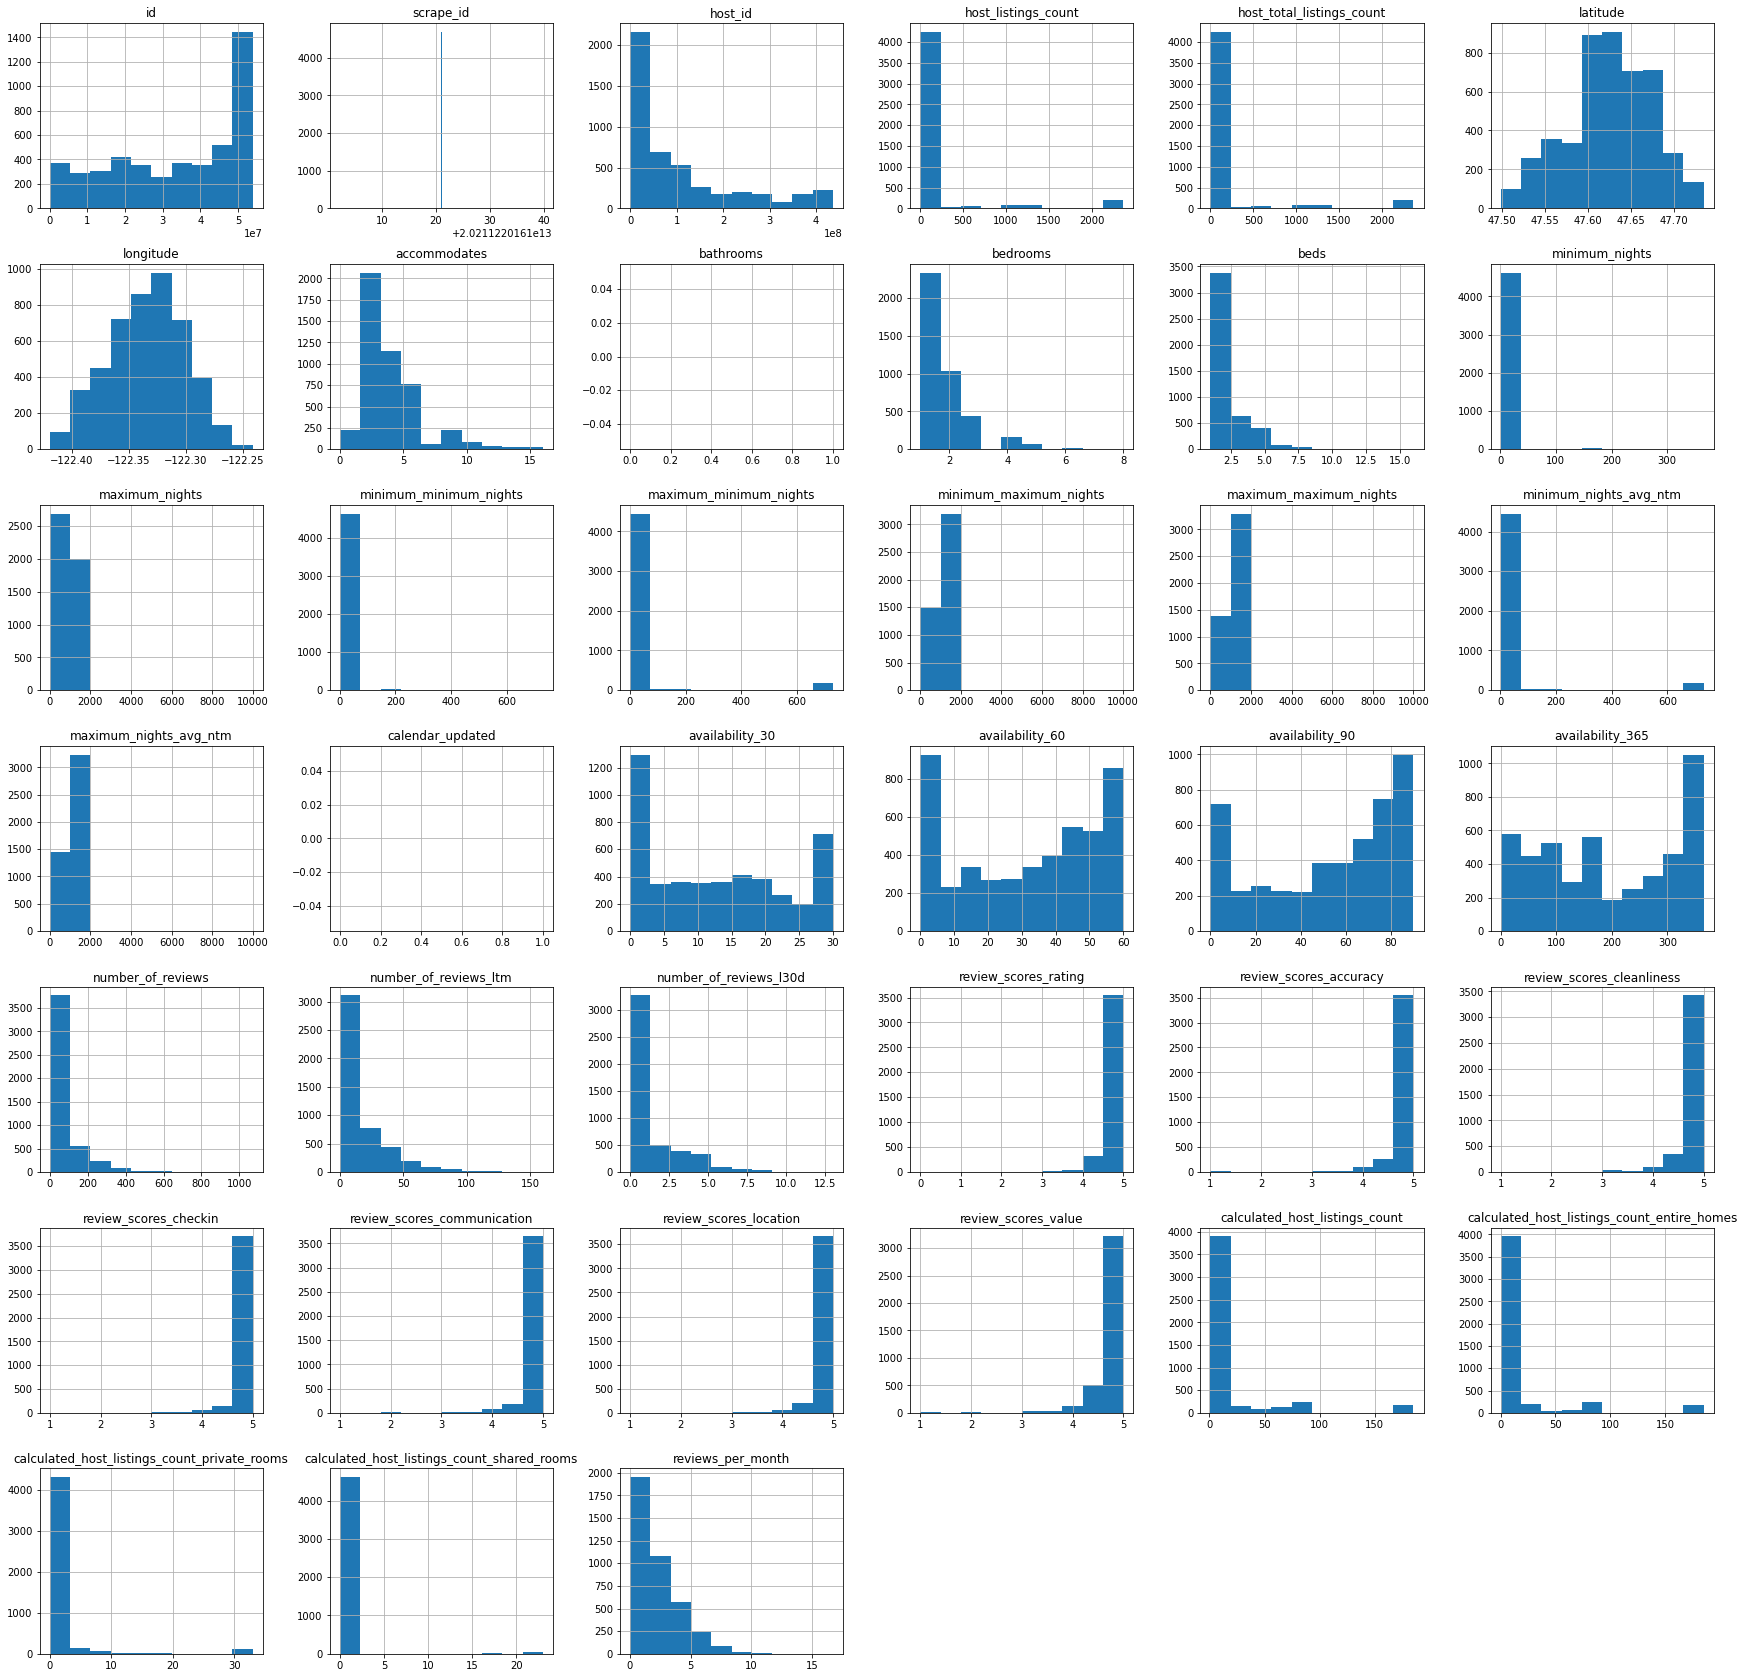

In [22]:
get_numeric(se_listings).hist(figsize=(30,30)) #Check how the data is distributed
plt.show()

### Step 2.3: Defining columns of interest

Next we are subsetting our dataset to only select those columns that are needed to answer our research questions. Additionally we will select columns that might have an impact on the price of a location to use them in our predictive model.
* host_response_rate
* host_acceptance_rate
* host_neighborhood
* host_is_superhost
* host_listings_count
* host_has_profile_pic
* host_identity_verified
* property_type
* room_type
* accomodates
* bathrooms
* bathrooms_text
* bedrooms
* beds
* amenities
* number_of_reviews
* number_of_reviews_l30d
* price
* review_score_rating
* review_score_location

In [23]:
col_interest = ['host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'number_of_reviews', 'number_of_reviews_l30d', 'price', 'review_scores_rating', 'review_scores_location']

## Step 3: Data Preparation

The third step of the Data Science Process is to prepare our data for analysis and model building.

### Step 3.1: Concatenating dataframes

First we will concatenate our datasets to have the data for all listings in on dataframe. To distinguish between the cities later we will add an additional 'cities' column.

In [24]:
# Add column to be able to distinguish between cities later
bo_listings['city'] = 'Boston'
se_listings['city'] = 'Seattle'

# Concate dataframes
all_listings = pd.concat([bo_listings, se_listings]).reset_index()

# Selecting columns of interest
col_interest = ['host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'number_of_reviews', 'number_of_reviews_l30d', 'price', 'review_scores_rating', 'city', 'review_scores_location'] # add city column

all_li_interest = all_listings[col_interest].copy() # Copy is needed to avoid SettingwithCopyWarning in lower lines

### Step 3.2: Clean columns

Now we will perform some data cleansing activities on several columns to be able to do further analysis.

#### Clean columns that are actually numeric

There are some columns that contain actually numeric values but have the object datatype for different reasons (e.g. the '$' in the price column). Additionally there are columns that contain 'f' and 't' (false and true). Those can be encoded in 0 and 1.

In [25]:
all_li_interest['host_response_rate'] = pd.to_numeric(all_li_interest['host_response_rate'].str.replace('%', ''))

all_li_interest['host_acceptance_rate'] = pd.to_numeric(all_li_interest['host_acceptance_rate'].str.replace('%', ''))

all_li_interest['host_is_superhost'] = all_li_interest['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)

all_li_interest['host_has_profile_pic'] = all_li_interest['host_has_profile_pic'].apply(lambda x: 1 if x == 't' else 0)

all_li_interest['host_identity_verified'] = all_li_interest['host_identity_verified'].apply(lambda x: 1 if x == 't' else 0)

all_li_interest['price'] = pd.to_numeric((all_li_interest['price'].str.replace('$', '')).str.replace(',', ''))

all_li_interest[['number_bathrooms','bathroom_type']] = all_li_interest['bathrooms_text'].str.split(' ',1,expand=True)
all_li_interest['number_bathrooms'] = pd.to_numeric(all_li_interest['number_bathrooms'], errors='coerce') # will change dtype of column to numeric but will return na for any values that were e.g. 'bath' in the bathrooms_text column
all_li_interest = all_li_interest.drop(['bathroom_type', 'bathrooms_text', 'bathrooms'], axis=1).copy()

/var/folders/88/q7qpw9qj78s795jgjkrs__b40000gn/T/ipykernel_39489/3879184910.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  all_li_interest['price'] = pd.to_numeric((all_li_interest['price'].str.replace('$', '')).str.replace(',', ''))


In [26]:
all_li_interest.head() # Investigate results

,host_response_rate,host_acceptance_rate,host_neighbourhood,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bedrooms,beds,amenities,number_of_reviews,number_of_reviews_l30d,price,review_scores_rating,city,review_scores_location,number_bathrooms
0,100.0,44.0,East Boston,1,5.0,1,0,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Cable TV"", ""Dishes and silverware"", ""Cooking...",21,0,125.0,4.95,Boston,4.86,1.0
1,100.0,97.0,Roxbury,1,4.0,1,1,Entire guest suite,Entire home/apt,2,1.0,1.0,"[""Cable TV"", ""Dishes and silverware"", ""Hair dr...",110,0,99.0,4.78,Boston,4.54,1.0
2,100.0,97.0,Roxbury,1,4.0,1,1,Entire condominium (condo),Entire home/apt,4,NaN,2.0,"[""Cable TV"", ""Dishes and silverware"", ""Cooking...",116,0,250.0,4.80,Boston,4.48,1.0
3,100.0,60.0,Beacon Hill,1,8.0,1,1,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Cable TV"", ""Elevator"", ""Dishes and silverwar...",25,0,80.0,4.64,Boston,4.96,1.0
4,100.0,60.0,Beacon Hill,1,8.0,1,1,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Cable TV"", ""Elevator"", ""Dishes and silverwar...",32,0,95.0,4.78,Boston,4.96,1.0


### Clean amenitites column

In the amenities column we face the issue that the values are stored in a string. To analyze how the presence/absence of different amenities will influence the price and reviews of a location we will need to clean this column. The result will look like One-Hot-Encoding, but we are not able to use the built-in python function here because all values are stored in one big string.

In [27]:
def clean_amenities(df=all_li_interest, column='amenities', n=10):
    '''
    INPUT:
    df: all_li_interest dataframe
    column: amenities column of the all_li_interest dataframe
    n: function will return the n most common amenities of all locations (default = 10)

    OUTPUT:
    amenities: a list containing all distinct amenities of all locations
    common_amenities: a list containing the n most common amenities of all locations
    common_amenities_count: a list consisting of tuples containing the n most common amenities and how often they occur in all locations
    '''

    pre_amenities = []
    amenities = []
    total_amenities = []
    common_n_amenities = []

    # Create list of lists containing all entries of the amenities column
    for value in df[column]:
        value = (value.strip('[')).strip(']')
        values = value.split(',')
        pre_amenities.append(values)

    # Create list containing all distinct amenities of the pre_amenities list
    for lst in pre_amenities:
        for amenity in lst:
            amenity = amenity.replace('"', '').strip(' ')
            if amenity not in amenities:
                amenities.append(amenity)
            else:
                continue

    # Create list containing all amenities that were mentioned in the listings (with multiple values=
    for lst in pre_amenities:
        for amenity in lst:
            amenity = amenity.replace('"', '').strip(' ')
            total_amenities.append(amenity)

    # Creates Counter dict for the amenities column using the total_amenities list
    amenities_count = Counter(total_amenities)

    # Creates list containing the top n amenities
    common_n_amenities_count = amenities_count.most_common(n)
    for i in common_n_amenities_count:
        common_n_amenities.append(i[0])

    return amenities, common_n_amenities, common_n_amenities_count

The information of the above function is used to create columns which indicate which of the top n (we use 10) amenities the location has.

In [28]:
distinct_amenities, common_amenities, common_amenities_count = clean_amenities()

all_li_interest[common_amenities] = 0
for amenity in common_amenities:
    all_li_interest.loc[all_li_interest['amenities'].str.contains(str(amenity)), str(amenity)] = 1

# Rename columns
amenity_column_titles = []
for amenity in common_amenities:
    amenity_column = amenity.replace(' ', '_')
    amenity_column = amenity_column.lower()
    amenity_column = 'has_' + amenity_column
    amenity_column_titles.append(amenity_column)

amenity_column_mapping = dict(zip(common_amenities, amenity_column_titles))

all_li_interest_cleaned_amenities = all_li_interest.rename(columns=amenity_column_mapping).copy()

In [29]:
all_li_interest_cleaned_amenities.head() # Investigate results

,host_response_rate,host_acceptance_rate,host_neighbourhood,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,...,has_smoke_alarm,has_wifi,has_essentials,has_carbon_monoxide_alarm,has_long_term_stays_allowed,has_kitchen,has_hangers,has_hair_dryer,has_heating,has_iron
0,100.0,44.0,East Boston,1,5.0,1,0,Entire rental unit,Entire home/apt,2,...,1,1,1,1,1,1,1,1,1,1
1,100.0,97.0,Roxbury,1,4.0,1,1,Entire guest suite,Entire home/apt,2,...,1,1,1,1,1,0,1,1,1,1
2,100.0,97.0,Roxbury,1,4.0,1,1,Entire condominium (condo),Entire home/apt,4,...,1,1,1,1,1,1,1,1,1,1
3,100.0,60.0,Beacon Hill,1,8.0,1,1,Entire rental unit,Entire home/apt,2,...,1,1,1,1,1,1,1,1,1,1
4,100.0,60.0,Beacon Hill,1,8.0,1,1,Entire rental unit,Entire home/apt,2,...,1,1,1,1,1,1,1,1,1,1


### Step 3.3: Imputate nan's in cleaned dataframe

Next we will imputate values for rows which contain nan values.

In [30]:
print(nan_perc(all_li_interest_cleaned_amenities)) # Investigate percentage of nan's in column

                         column  nan_percentage
0        review_scores_location        0.216553
1          review_scores_rating        0.214188
2            host_response_rate        0.178843
3          host_acceptance_rate        0.146360
4                      bedrooms        0.135905
5            host_neighbourhood        0.109521
6           host_listings_count        0.040448
7                          beds        0.039328
8              number_bathrooms        0.002738
9   has_long_term_stays_allowed        0.000000
10                  has_kitchen        0.000000
11                  has_hangers        0.000000
12               has_essentials        0.000000
13                     has_wifi        0.000000
14              has_smoke_alarm        0.000000
15               has_hair_dryer        0.000000
16                  has_heating        0.000000
17    has_carbon_monoxide_alarm        0.000000
18                        price        0.000000
19                         city        0

#### Imputate nan's for numeric columns

In [31]:
all_li_clean_imputated = all_li_interest_cleaned_amenities.copy()

# review_scores_rating column
all_li_clean_imputated['review_scores_rating'] = all_li_clean_imputated['review_scores_rating'].fillna(value=all_li_clean_imputated['review_scores_rating'].mean())

# review_scores_location column
all_li_clean_imputated['review_scores_location'] = all_li_clean_imputated['review_scores_location'].fillna(value=all_li_clean_imputated['review_scores_location'].mean())

# host_response_rate column
all_li_clean_imputated['host_response_rate'] = all_li_clean_imputated['host_response_rate'].fillna(value=all_li_clean_imputated['host_response_rate'].mean())

# host_acceptance_rate column
all_li_clean_imputated['host_acceptance_rate'] = all_li_clean_imputated['host_acceptance_rate'].fillna(value=all_li_clean_imputated['host_acceptance_rate'].mean())

# bedrooms column
all_li_clean_imputated['bedrooms'] = all_li_clean_imputated['bedrooms'].fillna(value=all_li_clean_imputated['bedrooms'].median()) # median, because bedrooms is a discrete variable

# host_listings_count column
all_li_clean_imputated['host_listings_count'] = all_li_clean_imputated['host_listings_count'].fillna(value=all_li_clean_imputated['host_listings_count'].median()) # median, because listings count is discrete and outliers bias the mean

# beds column
all_li_clean_imputated['beds'] = all_li_clean_imputated['beds'].fillna(value=all_li_clean_imputated['beds'].median()) # median, because beds is a discrete variable

# number_bathrooms column
all_li_clean_imputated['number_bathrooms'] = all_li_clean_imputated['number_bathrooms'].fillna(value=all_li_clean_imputated['number_bathrooms'].median()) # median, because number bathrooms is a discrete variable

In [32]:
nan_perc(all_li_clean_imputated) # Investigate results

,column,nan_percentage
0,host_neighbourhood,0.109521
1,host_response_rate,0.000000
2,review_scores_rating,0.000000
3,has_heating,0.000000
4,has_hair_dryer,0.000000
5,has_hangers,0.000000
6,has_kitchen,0.000000
7,has_long_term_stays_allowed,0.000000
8,has_carbon_monoxide_alarm,0.000000
9,has_essentials,0.000000


In [33]:
all_li_clean = all_li_clean_imputated.copy()

### Step 3.4: Investigate cleaned dataframe

Next we will perform some more EDA/investigation activities on our cleaned dataframe. First we will define some lists that separate our columns into e.g. categorical/numerical.

In [34]:
# Create lists for quantitative (non-binary), quantitative (binary) and object columns
numerical_binary_cols = ['has_heating', 'has_hair_dryer', 'has_hangers', 'has_kitchen', 'has_long_term_stays_allowed', 'has_carbon_monoxide_alarm'] + amenity_column_titles
numerical_non_binary_cols = ['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'number_of_reviews_l30d', 'price', 'review_scores_rating', 'number_bathrooms', 'review_scores_location']
categorical_cols = ['city', 'room_type', 'property_type', 'host_neighborhood']

#### Create histograms for quantitative non-binary colum

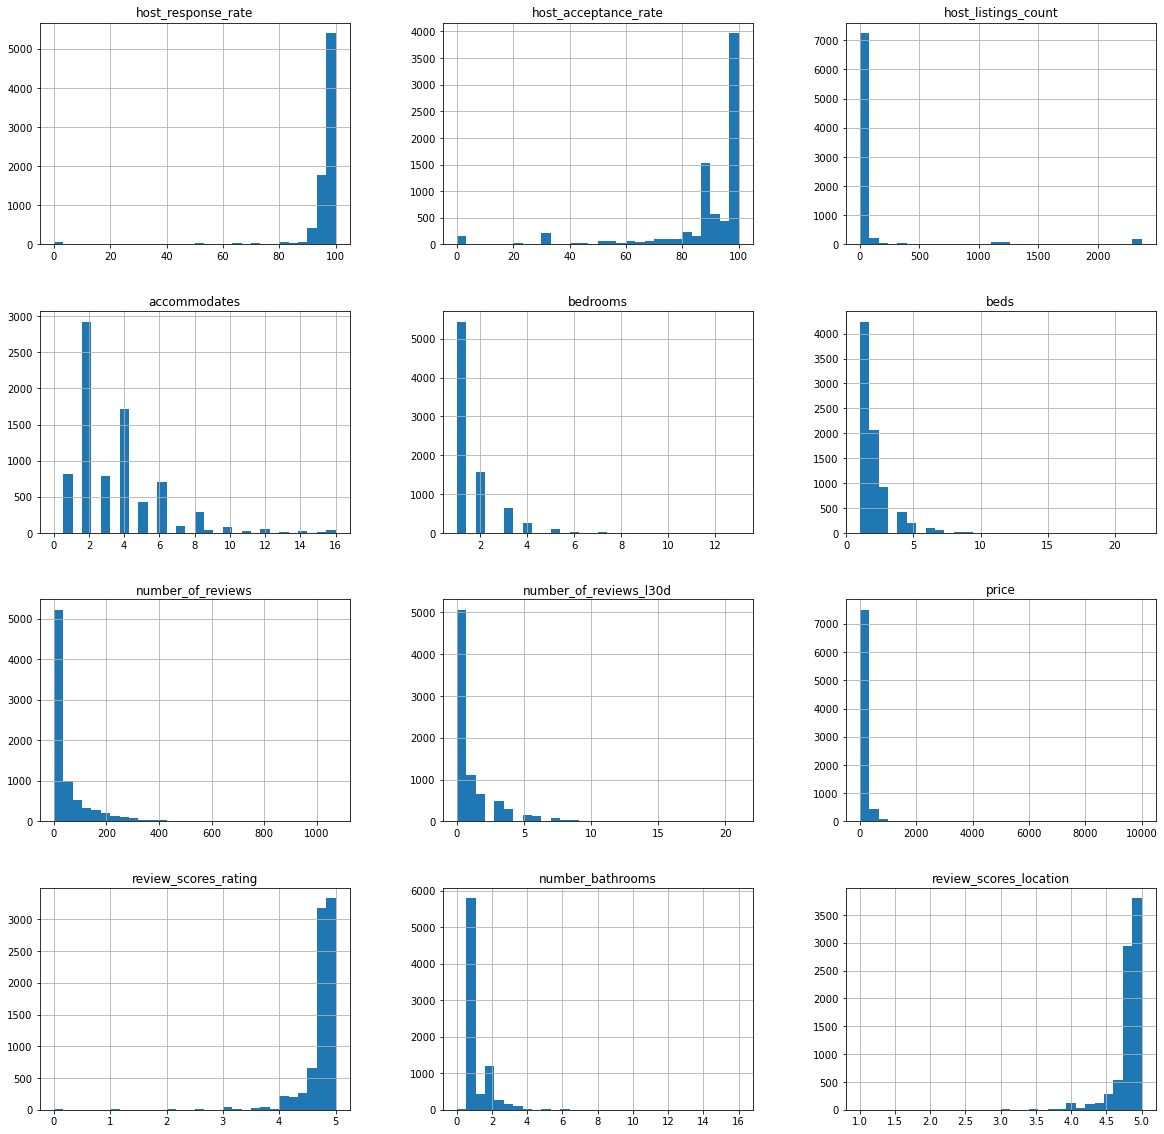

In [35]:
all_li_clean_imputated[numerical_non_binary_cols].hist(figsize=(20,20), bins=30)
plt.show()

#### Create Violin plots for quantitative non-binary columns

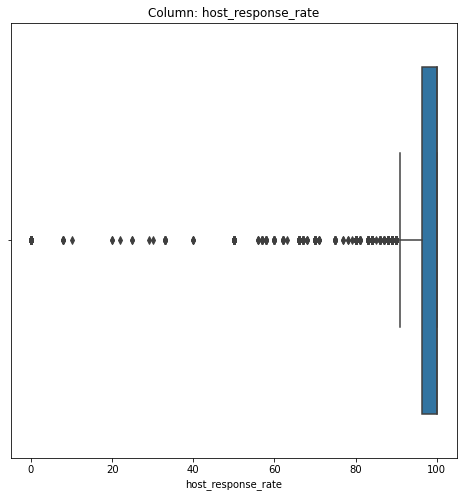

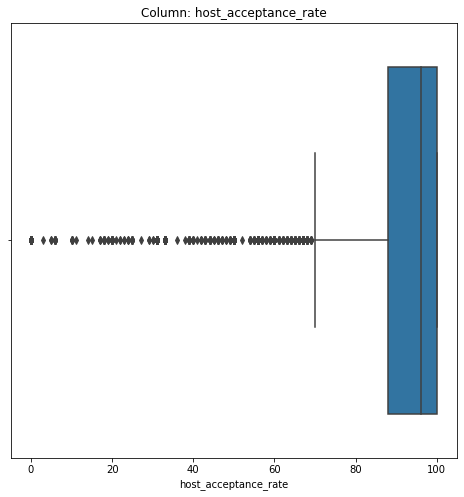

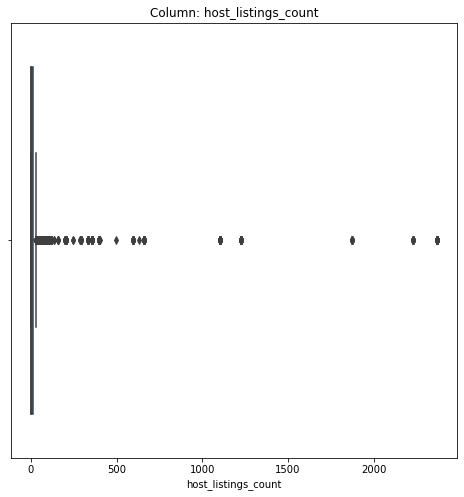

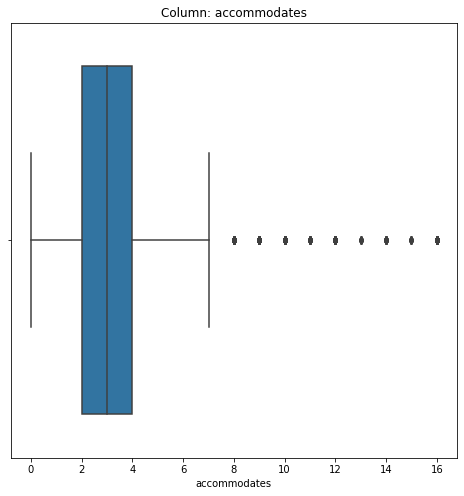

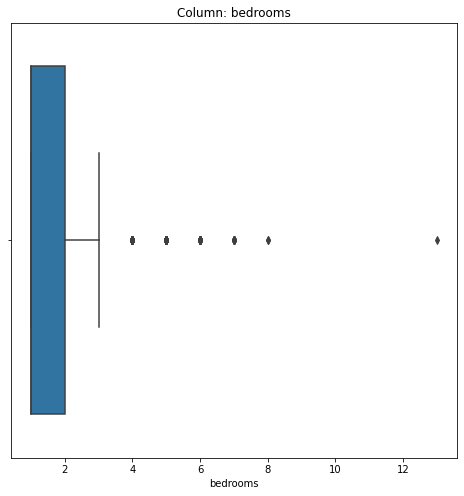

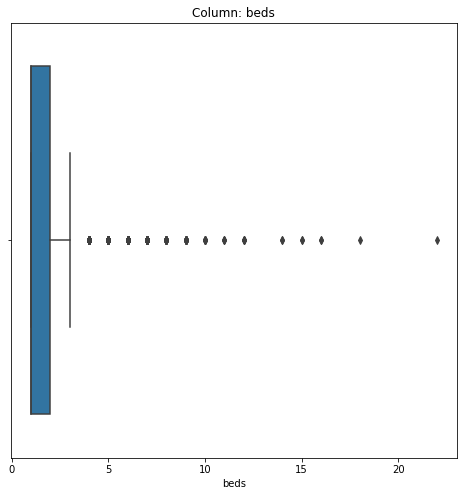

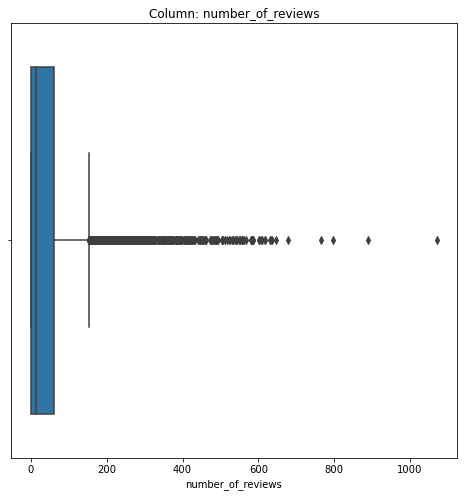

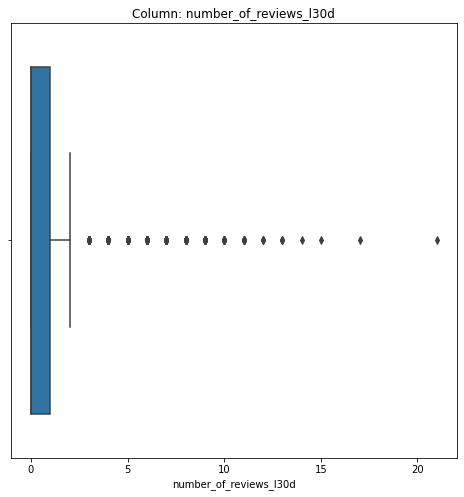

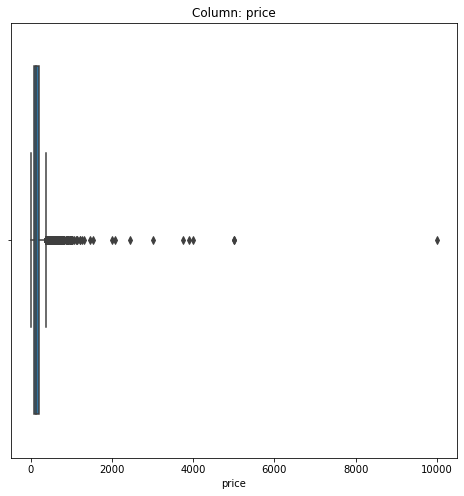

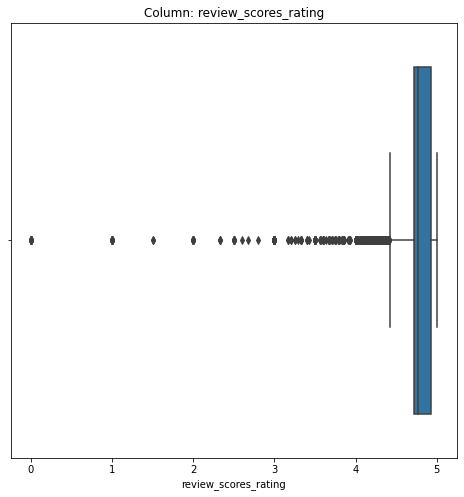

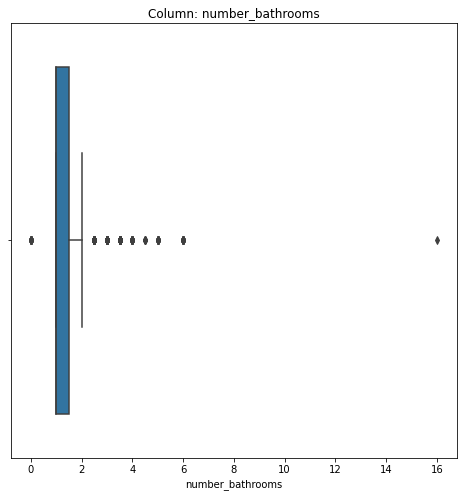

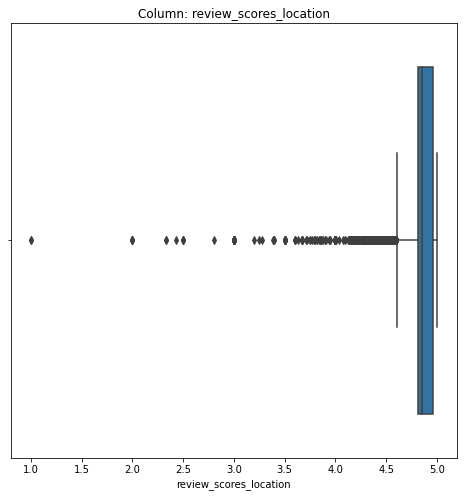

In [36]:
for col in numerical_non_binary_cols:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=all_li_clean_imputated[col])
    plt.title('Column: ' + col)
    plt.show()

### Step 3.5: Deal with outliers in columns
As seen in the violin plots above we are facing a lot of columns with skewed data. However, in most of the columns this should be no issue for our analysis and our prediction model. The columns where I assume outliers may lead to inaccurate predictions are of course price but also beds, bedrooms, accommodates and number_bathrooms as they have a strong correlation to the price (which we will see later). To deal with outliers I will the function below to detect them and then imputate the median of the respective column for the outlier.

In [37]:
def treat_outliers(df, columns, times_iqr):
    '''
    :param df: Any dataframe
    :param columns: The columns of the dataframe in which outliers should be treated
    :param times_iqr: The threshold for when a value will be classified as outlier. E.g. if times_iqr = 3 then all values above Q3 + 3 * IQR and all values below Q1 - 3 * IQR will be regarded as outliers
    :return: dataframe that contains the median instead of outliers which were detected by the rule above
    '''
    df_treated_outliers = df.copy()
    for column in columns:
        q1 = np.percentile(df[column], 25)
        q3 = np.percentile(df[column], 75)
        iqr = q3 - q1
        upper_bound = q3 + (times_iqr * iqr)
        lower_bound = q1 - (times_iqr * iqr)
        column_median = np.median(df[column])
        df_treated_outliers[column] = df_treated_outliers[column].apply(lambda x: column_median if x < lower_bound or x > upper_bound else x)
    return df_treated_outliers

In [38]:
all_li_clean_treated_outliers = treat_outliers(all_li_clean_imputated, ['price', 'beds', 'bedrooms', 'accommodates', 'number_bathrooms'], 4)

#### Inspect results
Below we compare the skew coefficients and create violin plot for the columns where we treated the outliers. Especially for the price column we were able to reduce the skewness drastically (from ~21 to ~1.6 for the skew coefficient). The data is still right skewed but with a much shorter tail than before.

In [39]:
before_treating_outliers = all_li_clean_imputated[['price', 'beds', 'bedrooms', 'accommodates', 'number_bathrooms']].skew(numeric_only=True)
after_treating_outliers = all_li_clean_treated_outliers[['price', 'beds', 'bedrooms', 'accommodates', 'number_bathrooms']].skew(numeric_only=True)
outlier_treating_result = (pd.DataFrame([before_treating_outliers, after_treating_outliers]).transpose()).rename(columns={0: 'before_treating_outliers', 1: 'after_treating_outliers'})
outlier_treating_result

,before_treating_outliers,after_treating_outliers
price,21.261972,1.662270
beds,3.121676,1.592532
bedrooms,2.375797,2.038774
accommodates,1.955177,1.418561
number_bathrooms,3.730501,1.839111


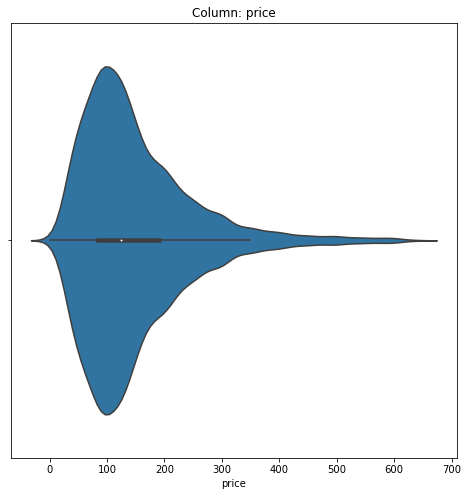

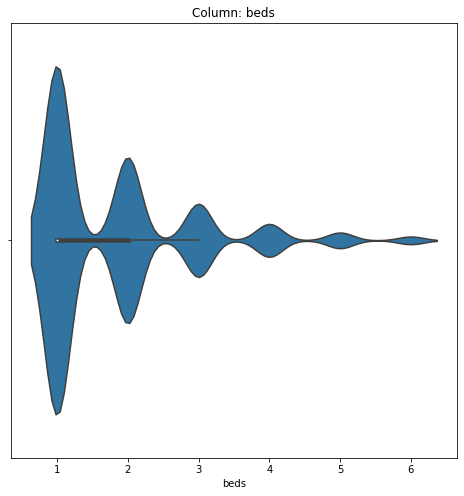

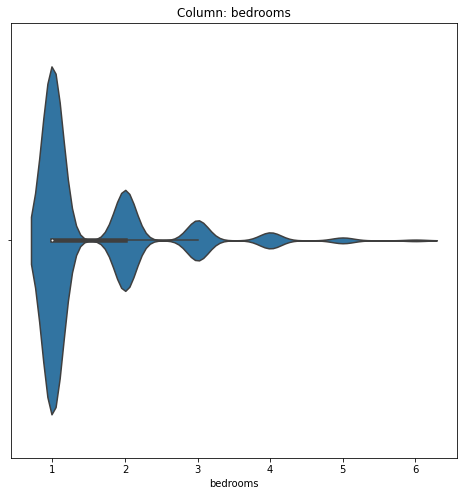

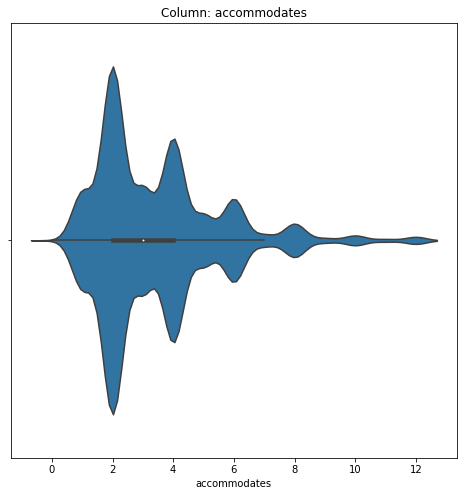

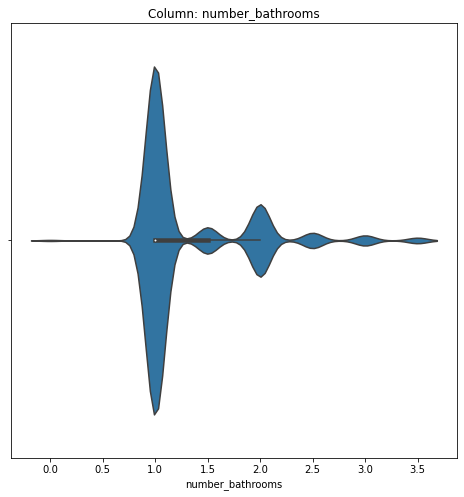

In [40]:
for col in ['price', 'beds', 'bedrooms', 'accommodates', 'number_bathrooms']:
    plt.figure(figsize=(8,8))
    sns.violinplot(x=all_li_clean_treated_outliers[col])
    plt.title('Column: ' + col)
    plt.show()


By cleaning several columns, using imputation methods and dealing with outliers in some columns we now have a cleaned dataframe we can use to answer our research questions.

In [41]:
all_li_clean = all_li_clean_treated_outliers.copy()

### Step 3.6: Answering research questions

We will use our cleaned data to answer our research questions in the section below.

#### Regarding the price

##### Is the price for a location higher if its located in certain neighbourhoods?

In the bar charts below we see that the neighbourhood has definitely an influence on the price of the locations that are in there. For example locations that are in West-Roxbury in Boston cost around 75 dollars per night on average while locations that are in Cambridge cost around 220 dollars per night.

However we have to keep in mind that in some neighbourhoods there are fewer locations and therefore a smaller data basis. To reduce this effect excluded the neighbourhoods that have very few locations in our function (< n) and included the error lines in the chart to give an overview for the fluctuation of the values.

In [42]:
def price_by_neighbourhood(city, df=all_li_clean, table=False, plot=True, which_plot='mean', n=20):
    '''
    :param city: the city we want to see the data for
    :param df: a dataframe (all_li_clean)
    :param table: True if we want the function to return a table containing the values
    :param plot: True if we want to see the plotted data
    :param which_plot: 'mean' or 'median' - defines which values we will see in the plot
    :param n: defines the threshold for how many locations need to be in the neighbourhood (to avoid that neighbourhoods containing e.g. 1 location will be included)
    :return: plot or table showing the mean or median price by neighbourhood
    '''
    city_df = df[df['city'] == city].copy()

    location_count = pd.DataFrame(city_df.host_neighbourhood.value_counts()).reset_index()
    location_count = location_count.rename(columns={'index': 'host_neighbourhood', 'host_neighbourhood': 'number_locations'}).copy()
    location_count_greater_n = location_count[location_count['number_locations'] > n]
    location_count_greater_n_lst = list(location_count_greater_n['host_neighbourhood'])
    city_df = city_df[city_df['host_neighbourhood'].isin(location_count_greater_n_lst)].copy()

    plot_order_mean = city_df.groupby('host_neighbourhood')['price'].mean().sort_values().index.values
    plot_order_median = city_df.groupby('host_neighbourhood')['price'].median().sort_values().index.values

    if plot is True:
        sns.set_theme(style="whitegrid")
        if which_plot == 'mean':
            plt.figure(figsize=(20,10))
            sns.barplot(data=city_df, x=city_df['host_neighbourhood'], y=city_df['price'], order=plot_order_mean, capsize=0.05, errwidth=2, color='deepskyblue')
            plt.xlabel('Neighbourhood', weight='bold').set_fontsize(15)
            plt.ylabel('Mean price', weight='bold').set_fontsize(15)
            plt.xticks(rotation=90)
            plt.title('Mean price per neighbourhood for locations in {city}'.format(city=city), weight='bold').set_fontsize(15)
            plt.show()
        elif which_plot == 'median':
            plt.figure(figsize=(20,10))
            sns.barplot(data=city_df, x=city_df['host_neighbourhood'], y=city_df['price'], estimator=np.median, order=plot_order_median, capsize=0.05, errwidth=2, color='deepskyblue')
            plt.xlabel('Neighbourhood')
            plt.ylabel('Median price')
            plt.xticks(rotation=90)
            plt.title('Median price per neighbourhood for locations in {city}'.format(city=city))
            plt.show()

    if table is True:
        mean_price = city_df.price.groupby(city_df['host_neighbourhood']).mean()
        median_price = city_df.price.groupby(city_df['host_neighbourhood']).median()
        number_locations = city_df['host_neighbourhood'].value_counts()
        column_names = ['host_neighbourhood', 'number_locations', 'mean_price', 'median_price']
        price_per_neighbourhood = pd.DataFrame([number_locations, mean_price, median_price]).transpose().reset_index()
        price_per_neighbourhood.columns = column_names
        price_per_neighbourhood_sorted = price_per_neighbourhood.sort_values(by='mean_price', ascending=False).reset_index(drop=True)

        return  price_per_neighbourhood_sorted


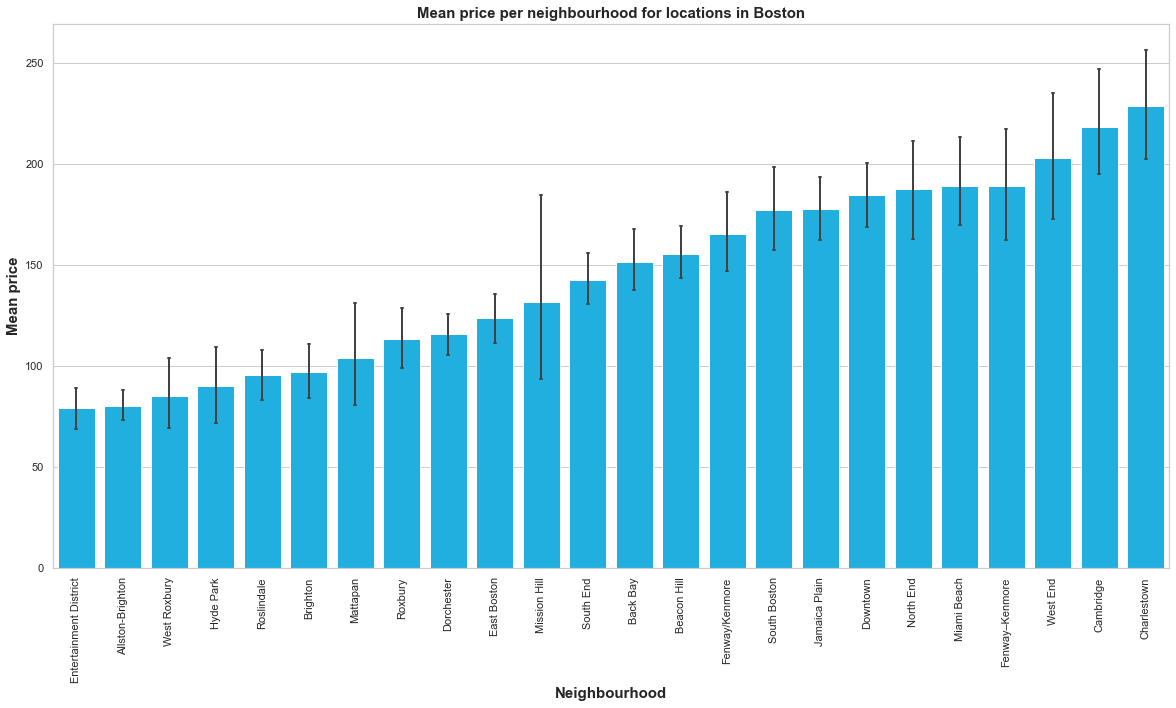

In [179]:
price_by_neighbourhood(city='Boston', which_plot='mean')

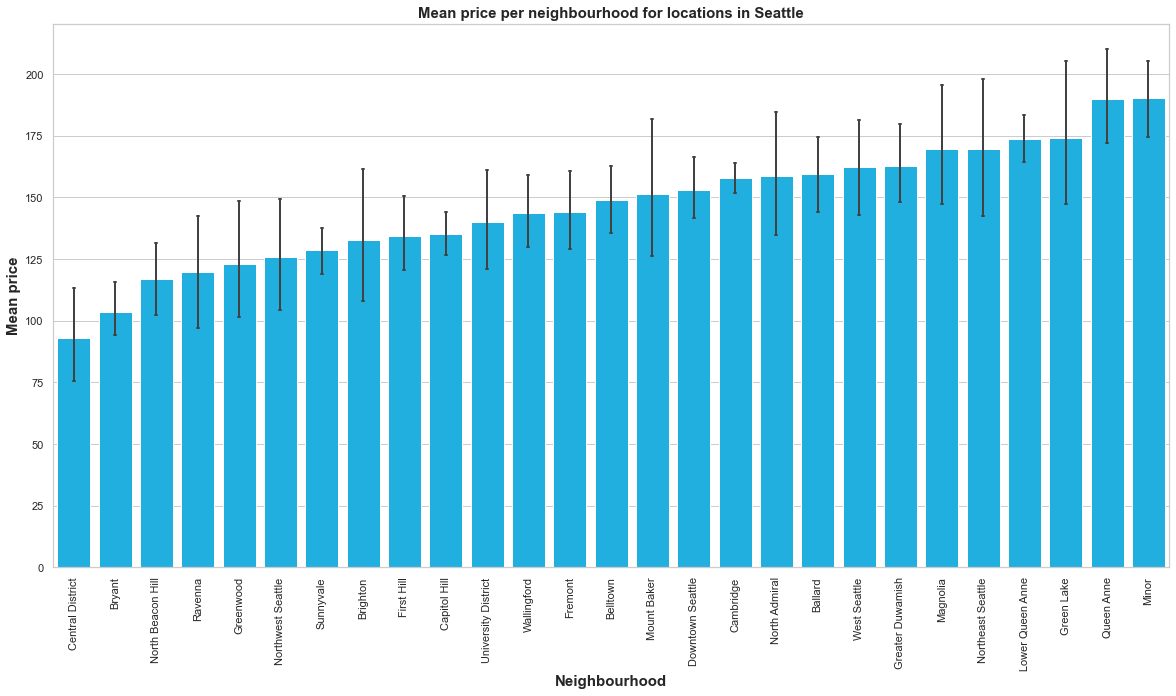

In [44]:
price_by_neighbourhood(city='Seattle', n=50, which_plot='mean')

##### Is the price for a location higher if it has a certain property type?

In the bar charts below we see that the property type also has an influence on the price of a location. For example private rooms in a residental home cost around 75 dollars per night, an entire townhouse around 240 dollars per night on average.

Again we have to keep in mind the smaller data basis for property types that only a few locations have.

In [153]:
def price_by_property_type(df=all_li_clean, table=False, plot=True, which_plot='mean', n=20, by_city=False):
    '''
    :param df: a dataframe (all_li_clean)
    :param table: True if we want the function to return a table containing the values
    :param plot: True if we want to see the plotted data
    :param which_plot: 'mean' or 'median' - defines which values we will see in the plot
    :param n: defines the threshold for how many locations need to have the property type (to avoid that neighbourhoods containing e.g. 1 location will be included)
    :param by_city: True if we want the plot to distinguish between Boston and Seattle
    :return: plot or table showing the mean or median price by property type
    '''
    # Pull out locations that have a property type that occurs more than n-times
    location_count = pd.DataFrame(df.property_type.value_counts()).reset_index()
    location_count = location_count.rename(columns={'index': 'property_type', 'property_type': 'number_locations'}).copy()
    location_count_greater_n = location_count[location_count['number_locations'] > n]
    location_count_greater_n_lst = list(location_count_greater_n['property_type'])
    df = df[df['property_type'].isin(location_count_greater_n_lst)].copy()

    plot_order_mean = df.groupby('property_type')['price'].mean().sort_values().index.values
    plot_order_median = df.groupby('property_type')['price'].median().sort_values().index.values

    if plot is True:
        sns.set_theme(style="whitegrid")
        if by_city is True:
            if which_plot == 'mean':
                plt.clf()
                plt.figure(figsize=(20,10))
                sns.barplot(data=df, x=df['property_type'], y=df['price'], order=plot_order_mean, hue='city', capsize=0.05, errwidth=2,  palette=['darkorange', 'deepskyblue'])
                plt.xlabel('Property type', weight='bold').set_fontsize(15)
                plt.ylabel('Mean price', weight='bold').set_fontsize(15)
                plt.xticks(rotation=90)
                plt.title('Mean price by property type', weight='bold').set_fontsize(15)
                plt.show()
            elif which_plot == 'median':
                plt.clf()
                plt.figure(figsize=(20,10))
                sns.barplot(data=df, x=df['property_type'], y=df['price'], hue='city', estimator=np.median, order=plot_order_median, capsize=0.05, errwidth=2,  palette=['darkorange', 'deepskyblue'])
                plt.xlabel('Property type', weight='bold').set_fontsize(15)
                plt.ylabel('Median price', weight='bold').set_fontsize(15)
                plt.xticks(rotation=90)
                plt.title('Median price by property type', weight='bold').set_fontsize(15)
                plt.show()
        if by_city is False:
            if which_plot == 'mean':
                plt.clf()
                plt.figure(figsize=(20,10))
                sns.barplot(data=df, x=df['property_type'], y=df['price'], order=plot_order_mean, ci=None,  color='deepskyblue')
                plt.xlabel('Property type', weight='bold').set_fontsize(15)
                plt.ylabel('Mean price', weight='bold').set_fontsize(15)
                plt.xticks(rotation=90, fontsize=15)
                #plt.title('Mean price by property type', weight='bold').set_fontsize(15)
                plt.show()
            elif which_plot == 'median':
                plt.clf()
                plt.figure(figsize=(20,10))
                sns.barplot(data=df, x=df['property_type'], y=df['price'], estimator=np.median, order=plot_order_median, capsize=0.05, errwidth=2,  color='deepskyblue')
                plt.xlabel('Property type', weight='bold').set_fontsize(15)
                plt.ylabel('Median price', weight='bold').set_fontsize(15)
                plt.xticks(rotation=90)
                plt.title('Median price by property type', weight='bold').set_fontsize(15)
                plt.show()

    if table is True:
        mean_price = df.price.groupby(df['property_type']).mean()
        median_price = df.price.groupby(df['property_type']).median()
        number_locations = df['property_type'].value_counts()
        column_names = ['property_type', 'number_locations', 'mean_price', 'median_price']
        price_per_property_type = pd.DataFrame([number_locations, mean_price, median_price]).transpose().reset_index()
        price_per_property_type.columns = column_names
        price_per_property_type_sorted = price_per_property_type.sort_values(by='mean_price', ascending=False).reset_index(drop=True)
        return   price_per_property_type_sorted

<Figure size 432x288 with 0 Axes>

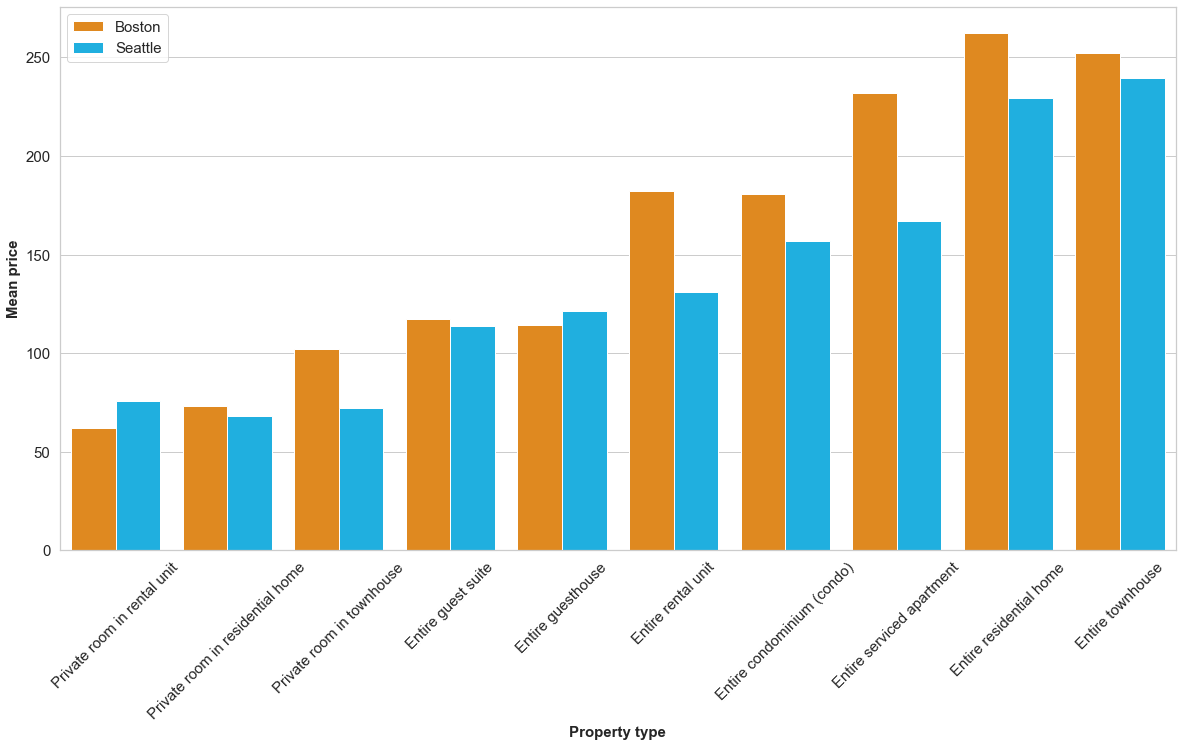

In [154]:
price_by_property_type(by_city=False, n=120)

##### Is the price of a location higher if it has more beds?

In our bar charts the positive correlation between the price and the number of beds is clearly visible.

In [157]:
def price_by_number_beds(df=all_li_clean, table=False, plot=True, which_plot='mean', by_city=False):
    '''
    :param df: a dataframe (all_li_clean)
    :param table: True if we want the function to return a table containing the values
    :param plot: True if we want to see the plotted data
    :param which_plot: 'mean' or 'median' - defines which values we will see in the plot
    :param by_city: True if we want the plot to distinguish between Boston and Seattle
    :return: plot or table showing the mean or median price by # of beds
    '''

    if plot is True:
        sns.set_theme(style="whitegrid")
        if by_city is True:
            if which_plot == 'mean':
                plt.clf()
                plt.figure(figsize=(20,10))
                sns.barplot(data=df, x=df['beds'], y=df['price'], hue='city', capsize=0.05, errwidth=2, palette=['darkorange', 'deepskyblue'])
                plt.xlabel('# beds', weight='bold').set_fontsize(15)
                plt.ylabel('Mean price', weight='bold').set_fontsize(15)
                plt.xticks(rotation=90)
                plt.title('Mean price by # beds', weight='bold').set_fontsize(15)
                plt.show()
            elif which_plot == 'median':
                plt.clf()
                plt.figure(figsize=(20,10))
                sns.barplot(data=df, x=df['beds'], y=df['price'], hue='city', estimator=np.median, capsize=0.05, errwidth=2,  palette=['darkorange', 'deepskyblue'])
                plt.xlabel('# beds', weight='bold').set_fontsize(15)
                plt.ylabel('Median price', weight='bold').set_fontsize(15)
                plt.xticks(rotation=90)
                plt.title('Median price by # beds', weight='bold').set_fontsize(15)
                plt.show()
        elif by_city is False:
            if which_plot == 'mean':
                plt.clf()
                plt.figure(figsize=(20,10))
                sns.barplot(data=df, x=df['beds'], y=df['price'], capsize=0.1, errwidth=2, palette=['darkorange', 'deepskyblue'])
                plt.xlabel('# beds', weight='bold').set_fontsize(15)
                plt.ylabel('Mean price', weight='bold').set_fontsize(15)
                plt.xticks(rotation=90)
                plt.title('Mean price by # beds', weight='bold').set_fontsize(15)
                plt.show()
            elif which_plot == 'median':
                plt.clf()
                plt.figure(figsize=(20,10))
                sns.barplot(data=df, x=df['beds'], y=df['price'], estimator=np.median, capsize=0.05, errwidth=2, palette=['darkorange', 'deepskyblue'])
                plt.xlabel('# beds', weight='bold').set_fontsize(15)
                plt.ylabel('Median price', weight='bold').set_fontsize(15)
                plt.xticks(rotation=90)
                plt.title('Median price by # beds', weight='bold').set_fontsize(15)
                plt.show()

    if table is True:
        mean_price = df.price.groupby(df['beds']).mean()
        median_price = df.price.groupby(df['beds']).median()
        number_locations = df['beds'].value_counts()
        column_names = ['number_beds', 'number_locations', 'mean_price', 'median_price']
        price_by_number_beds = pd.DataFrame([number_locations, mean_price, median_price]).transpose().reset_index()
        price_by_number_beds.columns = column_names
        price_by_number_beds_sorted = price_by_number_beds.sort_values(by='mean_price', ascending=False).reset_index(drop=True)
        return price_by_number_beds_sorted

<Figure size 432x288 with 0 Axes>

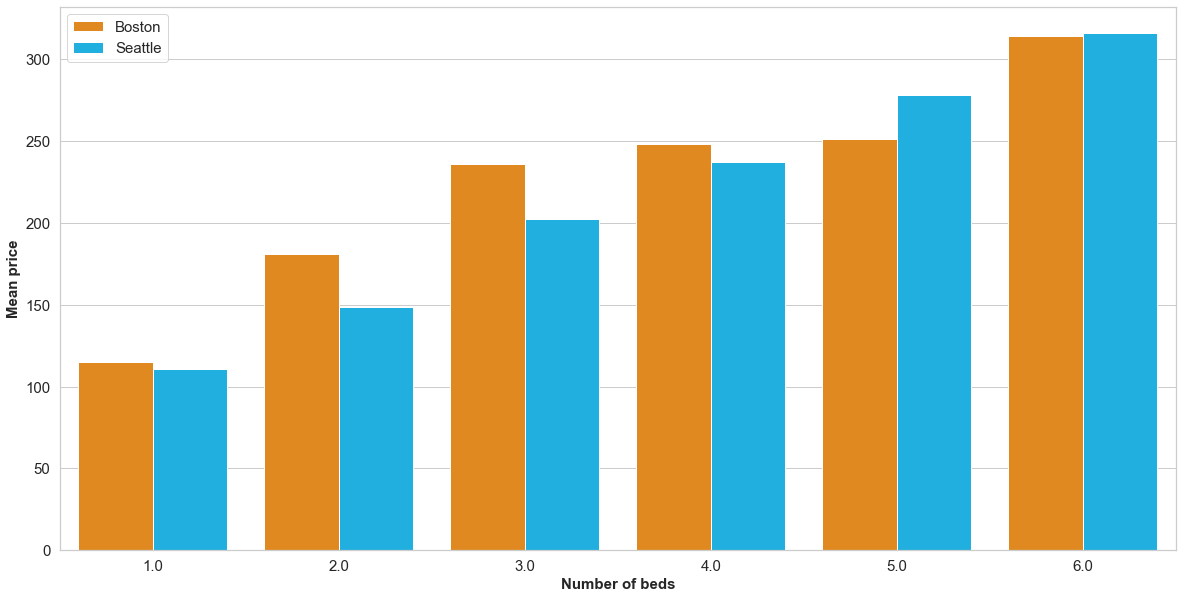

In [158]:
price_by_number_beds(by_city=True)

##### Is the price of a location higher if it accommodates more persons?

Same for the number of persons the location accommodates - the more persons accommodated, the higher the price of a location on average.

In [171]:
def price_by_accommodates(df=all_li_clean, table=False, plot=True, which_plot='mean', by_city=False):
    '''
    :param df: a dataframe (all_li_clean)
    :param table: True if we want the function to return a table containing the values
    :param plot: True if we want to see the plotted data
    :param which_plot: 'mean' or 'median' - defines which values we will see in the plot
    :param by_city: True if we want the plot to distinguish between Boston and Seattle
    :return: plot or table showing the mean or median price by # of people accommodated
    '''
    df = df[df['accommodates'] > 0].copy() # remove locations that accommodate 0 persons

    if plot is True:
        sns.set_theme(style="whitegrid")
        if by_city is True:
            if which_plot == 'mean':
                plt.clf()
                plt.figure(figsize=(20,10))
                sns.barplot(data=df, x=df['accommodates'], y=df['price'], hue='city', capsize=0.05, errwidth=2, palette=['darkorange', 'deepskyblue'])
                plt.xlabel('# persons accommodated', weight='bold').set_fontsize(15)
                plt.ylabel('Mean price', weight='bold').set_fontsize(15)
                plt.xticks(rotation=90)
                plt.title('Mean price by # persons accommodated', weight='bold').set_fontsize(15)
                plt.show()
            elif which_plot == 'median':
                plt.clf()
                plt.figure(figsize=(20,10))
                sns.barplot(data=df, x=df['accommodates'], y=df['price'], hue='city', estimator=np.median, capsize=0.05, errwidth=2, palette=['darkorange', 'deepskyblue'])
                plt.xlabel('# beds', weight='bold').set_fontsize(15)
                plt.ylabel('Median price', weight='bold').set_fontsize(15)
                plt.xticks(rotation=90)
                plt.title('Median price by # beds', weight='bold').set_fontsize(15)
                plt.show()
        elif by_city is False:
            if which_plot == 'mean':
                plt.clf()
                plt.figure(figsize=(20,10))
                sns.barplot(data=df, x=df['accommodates'], y=df['price'], hue='city', capsize=0.05, errwidth=2, color='deepskyblue')
                plt.xlabel('# persons accommodated', weight='bold').set_fontsize(15)
                plt.ylabel('Mean price', weight='bold').set_fontsize(15)
                plt.xticks(rotation=90)
                plt.title('Mean price by # persons accommodated', weight='bold').set_fontsize(15)
                plt.show()
            elif which_plot == 'median':
                plt.clf()
                plt.figure(figsize=(20,10))
                sns.barplot(data=df, x=df['accommodates'], y=df['price'], hue='city', estimator=np.median, capsize=0.05, errwidth=2, color='deepskyblue')
                plt.xlabel('# beds', weight='bold').set_fontsize(15)
                plt.ylabel('Median price', weight='bold').set_fontsize(15)
                plt.xticks(rotation=90)
                plt.title('Median price by # beds', weight='bold').set_fontsize(15)
                plt.show()

    if table is True:
            mean_price = df.price.groupby(df['accommodates']).mean()
            median_price = df.price.groupby(df['accommodates']).median()
            number_locations = df['accommodates'].value_counts()
            column_names = ['accommodates', 'number_locations', 'mean_price', 'median_price']
            price_by_accommodates_persons = pd.DataFrame([number_locations, mean_price, median_price]).transpose().reset_index()
            price_by_accommodates_persons.columns = column_names
            price_by_accommodates_persons_sorted = price_by_accommodates_persons.sort_values(by='mean_price', ascending=False).reset_index(drop=True)

            return price_by_accommodates_persons_sorted

<Figure size 432x288 with 0 Axes>

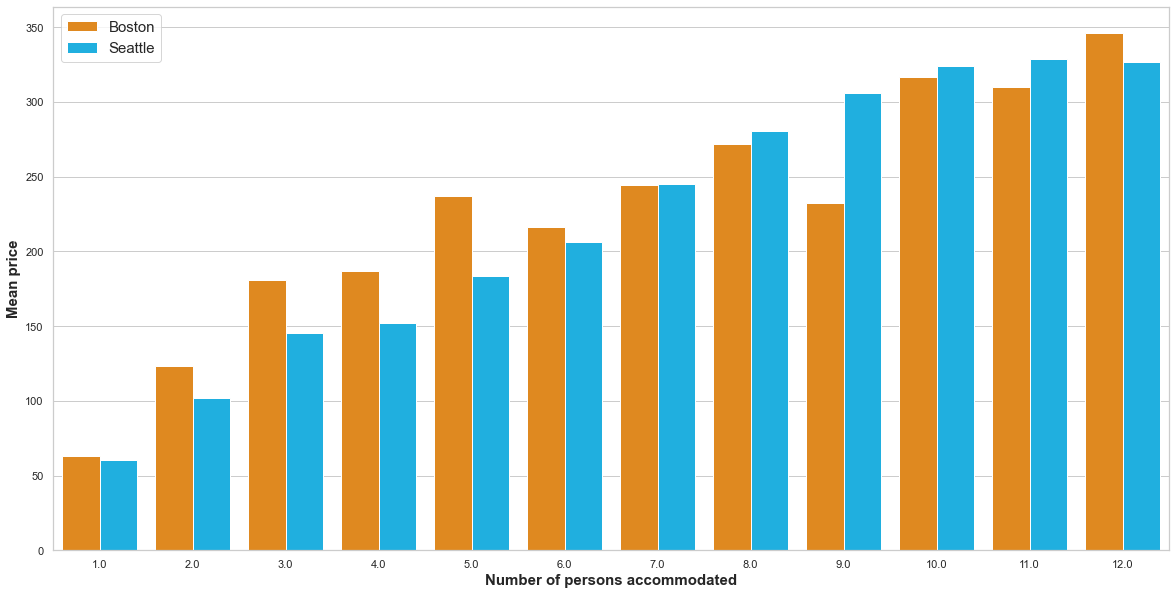

In [172]:
price_by_accommodates(by_city=True)

##### Is the price of a location lower if it misses some of the most common amenities?

This question is a bit tricky to answer. In our bar chart we see that for locations that only have 1-5 of the ten most common amenities there seems to be no clear trend on how the price of the location is influenced. However, here there are also very tall error lines, indicating that there is great fluctuation in price. An explanation for this might be that some people forgot to mention the amenities but looking at the post it is clear that the location has the most common amenitites.

If we look at the locations that have 6-10 of the then most common amenities, we see a more clear trend, indicating that locations that have more amenities also are more expensive on average.

In [51]:
all_li_clean_amenities = all_li_clean.copy()

# Create column that indicates how many of the ten most common amenities the respective location has
all_li_clean_amenities['amenity_score'] = all_li_clean_amenities['has_smoke_alarm'] \
                                                + all_li_clean_amenities['has_wifi'] + \
                                                + all_li_clean_amenities['has_essentials'] \
                                                + all_li_clean_amenities['has_carbon_monoxide_alarm'] \
                                                + all_li_clean_amenities['has_long_term_stays_allowed'] \
                                                + all_li_clean_amenities['has_kitchen'] \
                                                + all_li_clean_amenities['has_hangers'] \
                                                + all_li_clean_amenities['has_hair_dryer'] \
                                                + all_li_clean_amenities['has_heating'] \
                                                + all_li_clean_amenities['has_iron']

In [177]:
def price_by_amenities(df=all_li_clean_amenities, table=False, plot=True, which_plot='mean', by_city=False):
    '''
    :param df: a dataframe (all_li_clean)
    :param table: True if we want the function to return a table containing the values
    :param plot: True if we want to see the plotted data
    :param which_plot: 'mean' or 'median' - defines which values we will see in the plot
    :param by_city: True if we want the plot to distinguish between Boston and Seattle
    :return: plot or table showing the mean or median price by how many of the ten most common amenities the respective location has
    '''

    if plot is True:
        sns.set_theme(style="whitegrid")
        if by_city is True:
            if which_plot == 'mean':
                plt.clf()
                plt.figure(figsize=(20,10))
                sns.barplot(data=df, x=df['amenity_score'], y=df['price'], hue='city', capsize=0.05, errwidth=2, palette=['darkorange', 'deepskyblue'])
                plt.xlabel('Has number of ten most common amenities', weight='bold').set_fontsize(15)
                plt.ylabel('Mean price', weight='bold').set_fontsize(15)
                plt.title('Mean price by number of ten most common amenities', weight='bold').set_fontsize(15)
                plt.show()
            elif which_plot == 'median':
                plt.clf()
                plt.figure(figsize=(20,10))
                sns.barplot(data=df, x=df['amenity_score'], y=df['price'], hue='city', capsize=0.05, errwidth=2, palette=['darkorange', 'deepskyblue'])
                plt.xlabel('Has number of ten most common amenities', weight='bold').set_fontsize(15)
                plt.ylabel('Median price', weight='bold').set_fontsize(15)
                plt.title('Median price by number of ten most common amenities', weight='bold').set_fontsize(15)
                plt.show()
        elif by_city is False:
            if which_plot == 'mean':
                plt.clf()
                plt.figure(figsize=(20,10))
                sns.barplot(data=df, x=df['amenity_score'], y=df['price'], capsize=0.05, errwidth=2, color='deepskyblue')
                plt.xlabel('Has number of ten most common amenities', weight='bold').set_fontsize(15)
                plt.ylabel('Mean price', weight='bold').set_fontsize(15)
                plt.title('Mean price by number of ten most common amenities', weight='bold').set_fontsize(15)
                plt.show()
            elif which_plot == 'median':
                plt.clf()
                plt.figure(figsize=(20,10))
                sns.barplot(data=df, x=df['amenity_score'], y=df['price'], capsize=0.05, errwidth=2, color='deepskyblue')
                plt.xlabel('Has number of ten most common amenities', weight='bold').set_fontsize(15)
                plt.ylabel('Median price', weight='bold').set_fontsize(15)
                plt.title('Median price by number of ten most common amenities', weight='bold').set_fontsize(15)
                plt.show()

    if table is True:
        mean_price = df.price.groupby(df['amenity_score']).mean()
        median_price = df.price.groupby(df['amenity_score']).median()
        number_locations = df['amenity_score'].value_counts()
        column_names = ['amenity_score', 'number_locations', 'mean_price', 'median_price']
        price_per_amenity_score = pd.DataFrame([number_locations, mean_price, median_price]).transpose().reset_index()
        price_per_amenity_score.columns = column_names
        price_per_amenity_score_sorted = price_per_amenity_score.sort_values(by='mean_price', ascending=False).reset_index(drop=True)

        return   price_per_amenity_score_sorted

<Figure size 432x288 with 0 Axes>

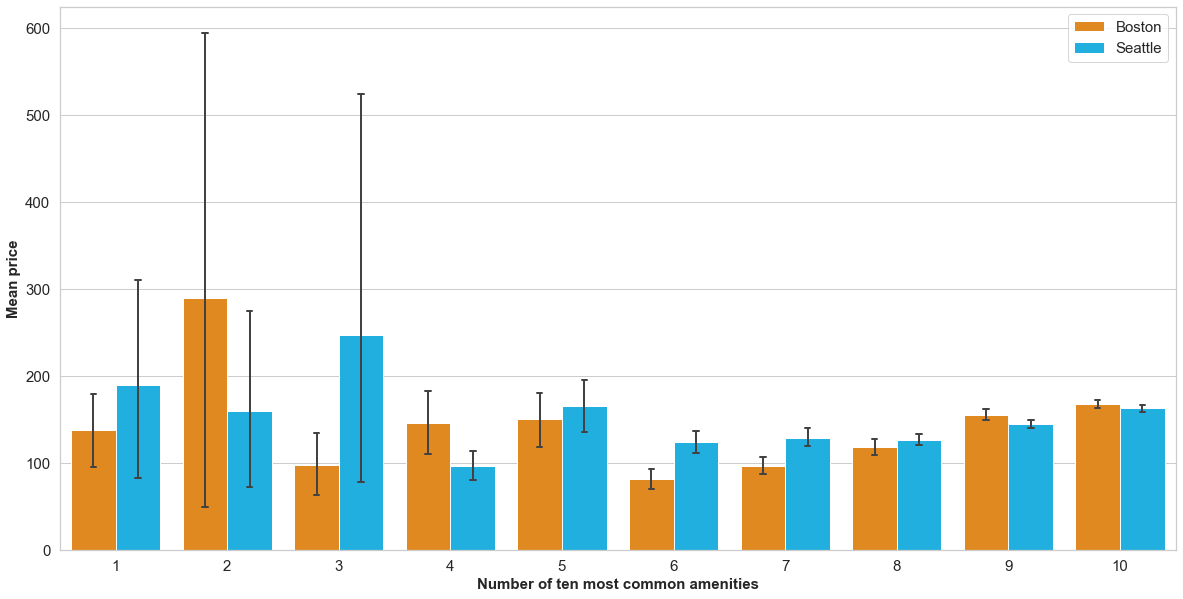

In [178]:
price_by_amenities(by_city=True)

#### Regarding the review score

In [54]:
all_li_clean.host_response_rate

0       100.0
1       100.0
2       100.0
3       100.0
4       100.0
        ...  
8030    100.0
8031    100.0
8032    100.0
8033    100.0
8034    100.0
Name: host_response_rate, Length: 8035, dtype: float64

##### Is the review score of a location higher if the host has a higher response rate?

We see no clear trend that the host response rate influences the review score for a location either positively or negatively.

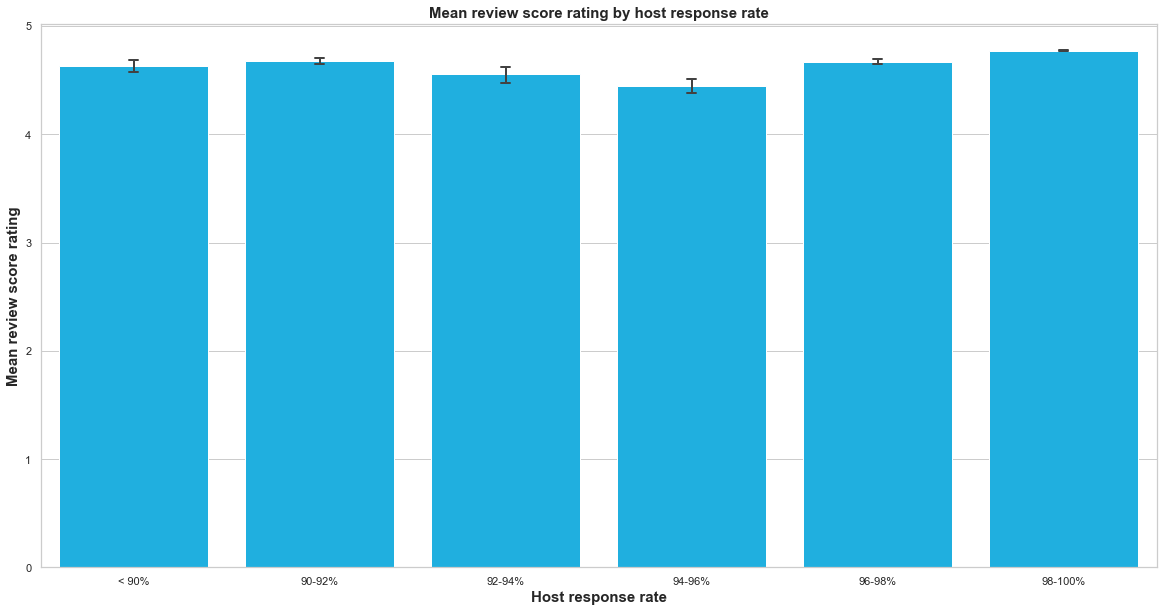

host_response_group
90-92%     4.677187
92-94%     4.556112
94-96%     4.448527
96-98%     4.670846
98-100%    4.773115
< 90%      4.633006
Name: review_scores_rating, dtype: float64

In [55]:

# Group Host response rating and provide average review score for each group
all_li_clean_host_response = all_li_clean.copy()
all_li_clean_host_response['host_response_group'] = all_li_clean_host_response['host_response_rate'].apply(lambda rating: '< 90%' if rating < 90 else '90-92%' if rating <= 92 else '92-94%' if rating <= 94 else '94-96%' if rating <= 96 else '96-98%' if rating <= 98 else '98-100%' if rating <= 100 else '')

plt.figure(figsize=(20,10))
sns.barplot(data=all_li_clean_host_response, x='host_response_group', y='review_scores_rating', order=['< 90%', '90-92%', '92-94%', '94-96%', '96-98%', '98-100%'], capsize=0.05, errwidth=2, color='deepskyblue')
plt.xlabel('Host response rate', weight='bold').set_fontsize(15)
plt.ylabel('Mean review score rating', weight='bold').set_fontsize(15)
plt.title('Mean review score rating by host response rate', weight='bold').set_fontsize(15)
plt.show()

table = all_li_clean_host_response['review_scores_rating'].groupby(all_li_clean_host_response['host_response_group']).mean()
table


##### Is the review score of a location higher if the host has a higher acceptance rate?

There tend to be a small positive correlation between the review score and the host acceptance rate but definitely not really clear.

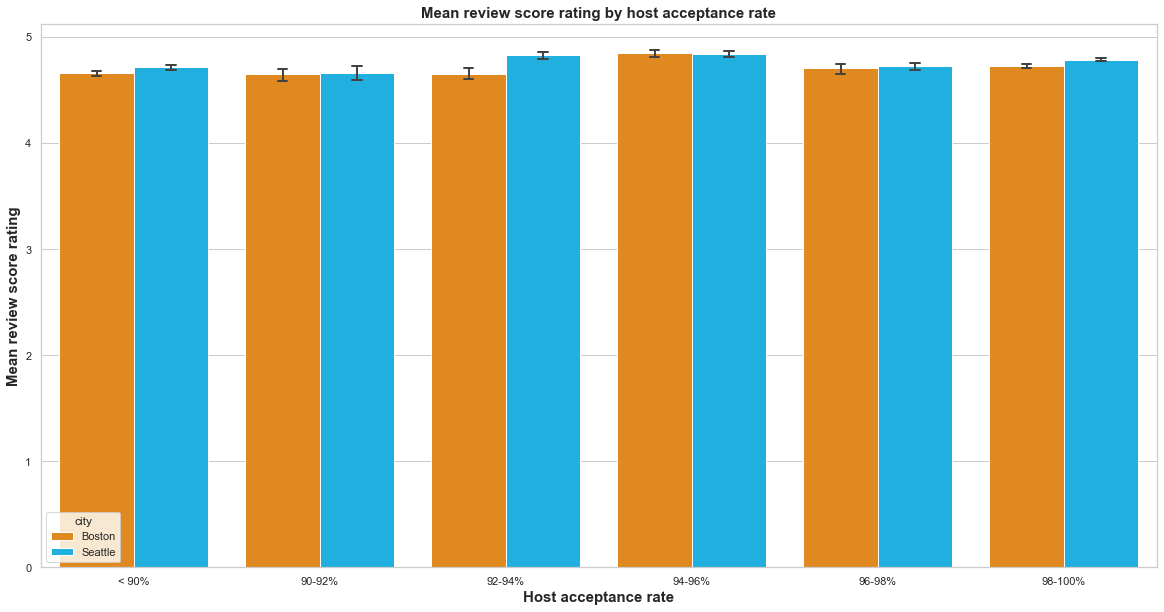

host_acceptance_group
90-92%     4.656127
92-94%     4.735168
94-96%     4.838642
96-98%     4.718860
98-100%    4.766388
< 90%      4.683817
Name: review_scores_rating, dtype: float64

In [56]:
all_li_clean_acceptance_rate = all_li_clean.copy()
all_li_clean_acceptance_rate['host_acceptance_group'] = all_li_clean_acceptance_rate['host_acceptance_rate'].apply(lambda rating: '< 90%' if rating < 90 else '90-92%' if rating <= 92 else '92-94%' if rating <= 94 else '94-96%' if rating <= 96 else '96-98%' if rating <= 98 else '98-100%' if rating <= 100 else '')

plt.figure(figsize=(20,10))
sns.barplot(data=all_li_clean_acceptance_rate, x='host_acceptance_group', y='review_scores_rating', hue='city', order=['< 90%', '90-92%', '92-94%', '94-96%', '96-98%', '98-100%'], capsize=0.05, errwidth=2, palette=['darkorange', 'deepskyblue'])
plt.xlabel('Host acceptance rate', weight='bold').set_fontsize(15)
plt.ylabel('Mean review score rating', weight='bold').set_fontsize(15)
plt.title('Mean review score rating by host acceptance rate', weight='bold').set_fontsize(15)
plt.show()

table = all_li_clean_acceptance_rate['review_scores_rating'].groupby(all_li_clean_acceptance_rate['host_acceptance_group']).mean()
table

##### Is the review score of a location lower if the host is no superhost?

The average review score for a location is about 0.18 points lower for hosts that are no superhosts.

In [57]:
table_superhost_mean = all_li_clean['review_scores_rating'].groupby(all_li_clean['host_is_superhost']).mean()
table_superhost_median = all_li_clean['review_scores_rating'].groupby(all_li_clean['host_is_superhost']).median()
table_superhost_median

host_is_superhost
0    4.724869
1    4.900000
Name: review_scores_rating, dtype: float64

##### Is the review score of a location higher if the host has a profile pic?

The average review score for a location is about 0.04 points lower for hosts that have no profile pic.

In [58]:
table_profile_pic_mean = all_li_clean['review_scores_rating'].groupby(all_li_clean['host_has_profile_pic']).mean()
table_profile_pic_median = all_li_clean['review_scores_rating'].groupby(all_li_clean['host_has_profile_pic']).median()
table_profile_pic_mean

host_has_profile_pic
0    4.685170
1    4.726704
Name: review_scores_rating, dtype: float64

## Step 4: Data Modeling

### Step 4.1: Add features for additional amenities (Feature engineering)

In this step we will add some additional features to our dataframe. We will use the amenities column to look for additional amenities that may influence the price. E.g. locations that have a pool should tend to be more expensive. To do so we just match a string for the amenity with the whole amenities column (which is a long string containing all amenities). Therefore the value 'TV' will match e.g. '24 inch tv' in the amenities columnm.

In [59]:
all_li_clean_additional_amenities = all_li_clean.copy()

In [60]:
additional_amenities_to_check = ['TV', 'Pool', 'Gym', 'parking', 'fireplace', 'balcony', 'cameras', 'oven', 'workspace', 'BBQ']

In [61]:
def additional_amenity_col(string, df=all_li_clean_additional_amenities):
    '''
    :param string: amenity to search in the amenities column
    :param df: any df (all_li_clean_additional_amenities)
    :return: the dataframe with an additional column that indicates if the amenity mentioned in string variable is in the amenities column
    '''
    col_title = 'has_' + string.lower()
    df[col_title] = 0
    df['amenities'] = df['amenities'].str.lower()
    df.loc[df['amenities'].str.contains(string.lower()), col_title] = 1

    return df

In [62]:
for amenity in additional_amenities_to_check:
    all_li_clean_additional_amenities = additional_amenity_col(amenity)

In [63]:
all_li_clean_additional_amenities

,host_response_rate,host_acceptance_rate,host_neighbourhood,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,...,has_tv,has_pool,has_gym,has_parking,has_fireplace,has_balcony,has_cameras,has_oven,has_workspace,has_bbq
0,100.0,44.0,East Boston,1,5.0,1,0,Entire rental unit,Entire home/apt,2.0,...,1,0,0,1,0,1,0,1,1,0
1,100.0,97.0,Roxbury,1,4.0,1,1,Entire guest suite,Entire home/apt,2.0,...,1,0,0,1,0,0,0,0,1,0
2,100.0,97.0,Roxbury,1,4.0,1,1,Entire condominium (condo),Entire home/apt,4.0,...,1,0,0,1,0,0,0,1,1,0
3,100.0,60.0,Beacon Hill,1,8.0,1,1,Entire rental unit,Entire home/apt,2.0,...,1,0,0,1,0,1,0,0,1,0
4,100.0,60.0,Beacon Hill,1,8.0,1,1,Entire rental unit,Entire home/apt,2.0,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,100.0,98.0,Cheesman Park,0,662.0,1,1,Entire rental unit,Entire home/apt,2.0,...,1,0,0,0,0,0,0,0,0,0
8031,100.0,96.0,Capitol Hill,1,26.0,1,0,Entire townhouse,Entire home/apt,6.0,...,1,0,0,1,0,1,0,1,1,1
8032,100.0,98.0,Central District,0,55.0,1,1,Private room in rental unit,Private room,1.0,...,0,0,0,0,0,0,0,0,1,0
8033,100.0,100.0,West Seattle,0,0.0,1,1,Entire residential home,Entire home/apt,5.0,...,1,0,0,1,0,0,1,0,1,0


### Step 4.2 Normalize numerical non-binary columns

We will use MinMax-Normalization to normalize the values in our dataframe and set their range between 0 and 1.

In [64]:
all_li_clean_normalized = all_li_clean_additional_amenities.copy()

In [65]:
quant_non_binary_cols_no_price = [column for column in numerical_non_binary_cols if column != 'price']
scaler = preprocessing.MinMaxScaler()
all_li_clean_normalized[quant_non_binary_cols_no_price] = scaler.fit_transform(all_li_clean_normalized[quant_non_binary_cols_no_price])

In [66]:
all_li_clean_normalized.head()

,host_response_rate,host_acceptance_rate,host_neighbourhood,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,...,has_tv,has_pool,has_gym,has_parking,has_fireplace,has_balcony,has_cameras,has_oven,has_workspace,has_bbq
0,1.0,0.44,East Boston,1,0.002111,1,0,Entire rental unit,Entire home/apt,0.166667,...,1,0,0,1,0,1,0,1,1,0
1,1.0,0.97,Roxbury,1,0.001688,1,1,Entire guest suite,Entire home/apt,0.166667,...,1,0,0,1,0,0,0,0,1,0
2,1.0,0.97,Roxbury,1,0.001688,1,1,Entire condominium (condo),Entire home/apt,0.333333,...,1,0,0,1,0,0,0,1,1,0
3,1.0,0.60,Beacon Hill,1,0.003377,1,1,Entire rental unit,Entire home/apt,0.166667,...,1,0,0,1,0,1,0,0,1,0
4,1.0,0.60,Beacon Hill,1,0.003377,1,1,Entire rental unit,Entire home/apt,0.166667,...,1,0,0,1,0,1,0,0,1,0


### Step 4.3: One-Hot-Encoding for other columns
Next we will use One-Hot-Encoding for the categorical columns in our dataframe to include those into our prediction model

In [67]:
all_li_clean_encoded = all_li_clean_normalized.copy()

In [68]:
all_li_clean_encoded = pd.get_dummies(data=all_li_clean_encoded, columns=['property_type', 'host_neighbourhood', 'room_type'])

In [69]:
all_li_clean_encoded.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,amenities,...,host_neighbourhood_Westside,host_neighbourhood_White Rock East,host_neighbourhood_Williamsburg,host_neighbourhood_Windermere,host_neighbourhood_Windsor Park,host_neighbourhood_Yesler Terrace,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1.0,0.44,1,0.002111,1,0,0.166667,0.0,0.0,"[""cable tv"", ""dishes and silverware"", ""cooking...",...,0,0,0,0,0,0,1,0,0,0
1,1.0,0.97,1,0.001688,1,1,0.166667,0.0,0.0,"[""cable tv"", ""dishes and silverware"", ""hair dr...",...,0,0,0,0,0,0,1,0,0,0
2,1.0,0.97,1,0.001688,1,1,0.333333,0.0,0.2,"[""cable tv"", ""dishes and silverware"", ""cooking...",...,0,0,0,0,0,0,1,0,0,0
3,1.0,0.60,1,0.003377,1,1,0.166667,0.0,0.0,"[""cable tv"", ""elevator"", ""dishes and silverwar...",...,0,0,0,0,0,0,1,0,0,0
4,1.0,0.60,1,0.003377,1,1,0.166667,0.0,0.0,"[""cable tv"", ""elevator"", ""dishes and silverwar...",...,0,0,0,0,0,0,1,0,0,0


#### Step 4.4: Select features

In this step we investigate the the pearson correlation of all of the columns to the price. We define a function that returns a list of columns that have an higher (positive/negative) correlation to the price column than a given threshold. Later we will also test our model performance for different thresholds (see Section 5).

In [70]:
price_correlations = pd.DataFrame((all_li_clean_encoded.corr(method='pearson'))['price']).reset_index()
price_correlations = price_correlations.rename(columns={'index': 'feature', 'price': 'corr'})
price_correlations.sort_values(by='corr').reset_index(drop=True)

,feature,corr
0,room_type_Private room,-0.418135
1,property_type_Private room in residential home,-0.272230
2,property_type_Private room in rental unit,-0.261330
3,host_neighbourhood_Allston-Brighton,-0.153227
4,host_has_profile_pic,-0.143897
...,...,...
312,room_type_Entire home/apt,0.435006
313,beds,0.490002
314,accommodates,0.572052
315,bedrooms,0.589806


In [71]:
def get_features(threshhold, correlations=price_correlations):
    '''
    :param threshhold: defines how high a pearson correlation to price needs to be that the column gets included in the features list
    :param correlations: table that includes the correlations of the columns to price (price_correlations)
    :return:
    '''
    ftrs = list((price_correlations.loc[(price_correlations['corr'] > threshhold) | (price_correlations['corr'] < -threshhold), ['feature']])['feature'])
    ftrs.remove('price')
    return ftrs

In [72]:
features = get_features(0.03)
target = ['price']
features

['host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'accommodates',
 'bedrooms',
 'beds',
 'number_of_reviews',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_location',
 'number_bathrooms',
 'has_essentials',
 'has_carbon_monoxide_alarm',
 'has_long_term_stays_allowed',
 'has_kitchen',
 'has_hangers',
 'has_hair_dryer',
 'has_heating',
 'has_iron',
 'has_tv',
 'has_pool',
 'has_gym',
 'has_fireplace',
 'has_balcony',
 'has_oven',
 'has_bbq',
 'property_type_Entire condominium (condo)',
 'property_type_Entire guest suite',
 'property_type_Entire guesthouse',
 'property_type_Entire rental unit',
 'property_type_Entire residential home',
 'property_type_Entire serviced apartment',
 'property_type_Entire townhouse',
 'property_type_Entire villa',
 'property_type_Private room in bungalow',
 'property_type_Private room in condominium (condo)',
 'property_type_Private room in guest suite',
 'property

### Step 4.5: Build model

Below we built our Linear Regression model and fitted it to our prepared data. Looking at the results (RSME and R2) it is visible that our model has a similar performance on our train and test data. It even performs a little bit better on our test data which might indicate that the model is slightly underfitted. We will perform some further investgation of the model performance in section 5.

At a first glance the model seems to have a problem predicting the prices of more expensive locations accurately. Especially for locations that cost more than 400 dollars per night our model predicts the prices regularly to low. An reason for this might be that in these price ranges we have a smaller data basis.

In [73]:
def lm_model(features, target, df=all_li_clean_encoded, plot=True, print_performance=True):
    '''
    :param features: List containing feature columns
    :param target: List containing the target column
    :param df: A dataframe (all_li_clean_encoded)
    :param plot: Shows scatterplot with predicted vs. true values for train and test data if True
    :param print_performance: Prints R2 and RSME for test and train data if True
    :return: R2 and RSME for train and test data
    '''
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    predicted_test = linear_model.predict(X_test)
    predicted_train = linear_model.predict(X_train)
    r2_test = r2_score(y_test, predicted_test)
    rsme_test = mean_squared_error(y_test, predicted_test, squared=False)
    r2_train = r2_score(y_train, predicted_train)
    rsme_train = mean_squared_error(y_train, predicted_train, squared=False)

    if plot is True:
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,10))
        ax1.scatter(y=predicted_test, x=y_test, alpha=0.7, color='deepskyblue')
        ax1.plot(y_test, y_test, color='darkorange')
        ax1.set_title('Performance on test data', weight='bold').set_fontsize(15)
        ax1.set_ylabel('Predicted prices', weight='bold').set_fontsize(15)
        ax1.set_xlabel('True prices', weight='bold').set_fontsize(15)

        ax2.scatter(y=predicted_train, x=y_train, alpha=0.7, color='deepskyblue')
        ax2.plot(y_test, y_test, color='darkorange')
        ax2.set_title('Performance on train data', weight='bold').set_fontsize(15)
        ax2.set_ylabel('Predicted prices', weight='bold').set_fontsize(15)
        ax2.set_xlabel('True prices', weight='bold').set_fontsize(15)
        plt.show()

    if print_performance is True:
        print(
            '   R2 test data: {r2_test} \
                RSME test data: {rsme_test} \
                R2 train data: {r2_train} \
                RSME train data: {rsme_train}'.format(r2_test=r2_test, rsme_test=rsme_test, r2_train=r2_train, rsme_train=rsme_train))

    return r2_test, r2_train, rsme_test, rsme_train



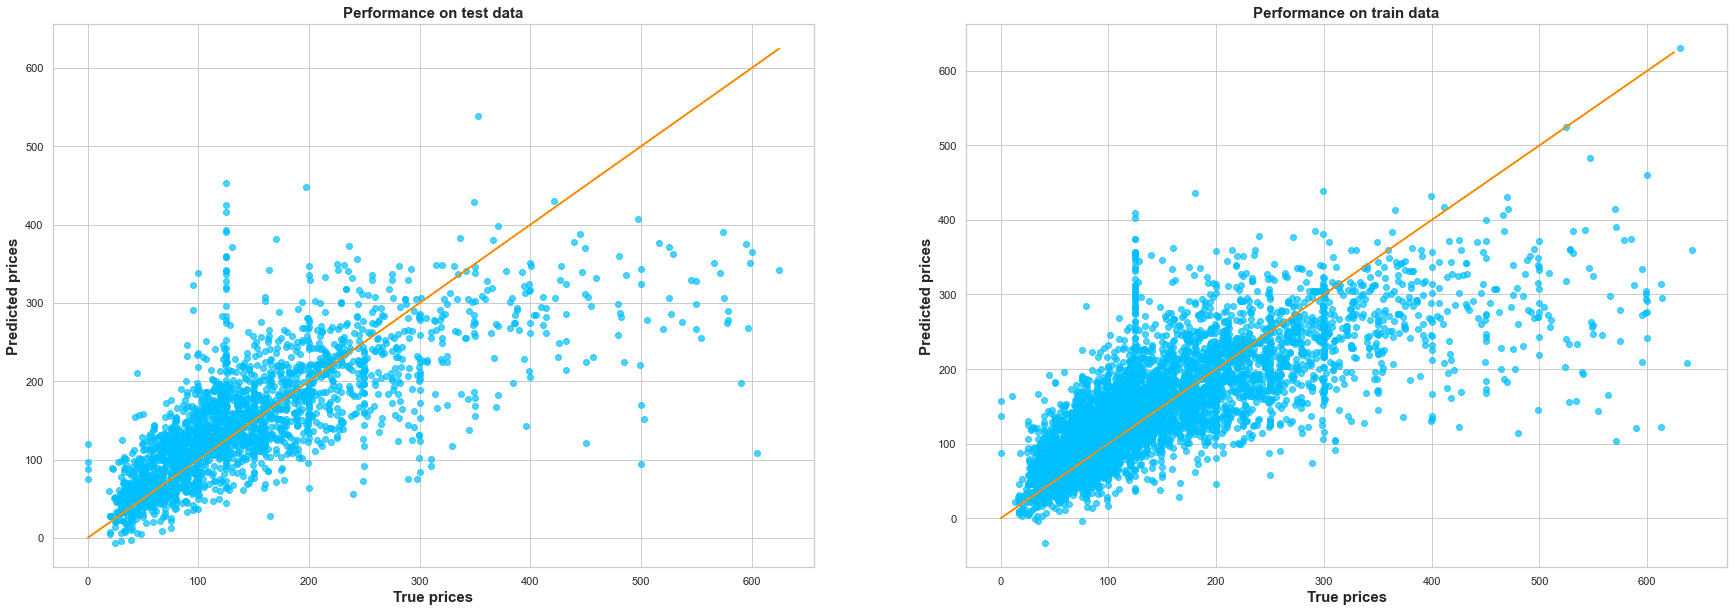

   R2 test data: 0.5481287446814476                 RSME test data: 66.25148256403439                 R2 train data: 0.5660564046246442                 RSME train data: 64.08297801055167


(0.5481287446814476, 0.5660564046246442, 66.25148256403439, 64.08297801055167)

In [74]:
lm_model(features, target, plot=True, print_performance=True)

## Step 5: Result evaluation
In the final step of this workbook we will investigate and evaluate the performance of the model we built in step 4.

### Step 5.1: Test model performance for correlation thresholds

With the function below we are checking if the model performs better if we choose fewer features (that have a higher correlation) or if it is better if we use more features out of the dataset. By looking at the graphs we see that the models performance is higher if we select more features even if they do not have a high correlation to the price (the best RSME and R2 values are reached with an threshold of 0.05 for the correlation of the features).

In [75]:
def model_performance_correlation_threshold(thresholds, df=all_li_clean_encoded, plot=True):
    '''
    :param thresholds: list of thresholds for pearson correlation
    :param df: a dataframe (all_li_clean_encoded)
    :param plot: Plots graphs that show the model performance on train and test data for different values in threshold
    '''

    r2_test_values = []
    r2_train_values = []
    rsme_test_values = []
    rsme_train_values = []

    for threshold in thresholds:
        features = get_features(threshold)
        target = ['price']
        r2_test, r2_train, rsme_test, rsme_train = lm_model(df=df, features=features, target=target, plot=False, print_performance=False)
        r2_test_values.append(r2_test)
        r2_train_values.append(r2_train)
        rsme_test_values.append(rsme_test)
        rsme_train_values.append(rsme_train)

    if plot is True:
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,10))
        ax1.plot(thresholds, r2_train_values, color='darkorange', label='Train data')
        ax1.plot(thresholds, r2_test_values, color='deepskyblue', label='Test data')
        ax1.set_title('R2 values for different price ranges', weight='bold').set_fontsize(15)
        ax1.set_ylabel('R2', weight='bold').set_fontsize(15)
        ax1.set_xlabel('Thresholds for correlation', weight='bold').set_fontsize(15)
        ax1.legend()

        ax2.plot(thresholds, rsme_train_values, color='darkorange', label='Train data')
        ax2.plot(thresholds, rsme_test_values, color='deepskyblue', label='Test data')
        ax2.set_title('RSME values for different price ranges', weight='bold').set_fontsize(15)
        ax2.set_ylabel('RSME', weight='bold').set_fontsize(15)
        ax2.set_xlabel('Thresholds for correlation', weight='bold').set_fontsize(15)
        ax2.legend()
        plt.show()

In [76]:
thresholds = [0.03, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

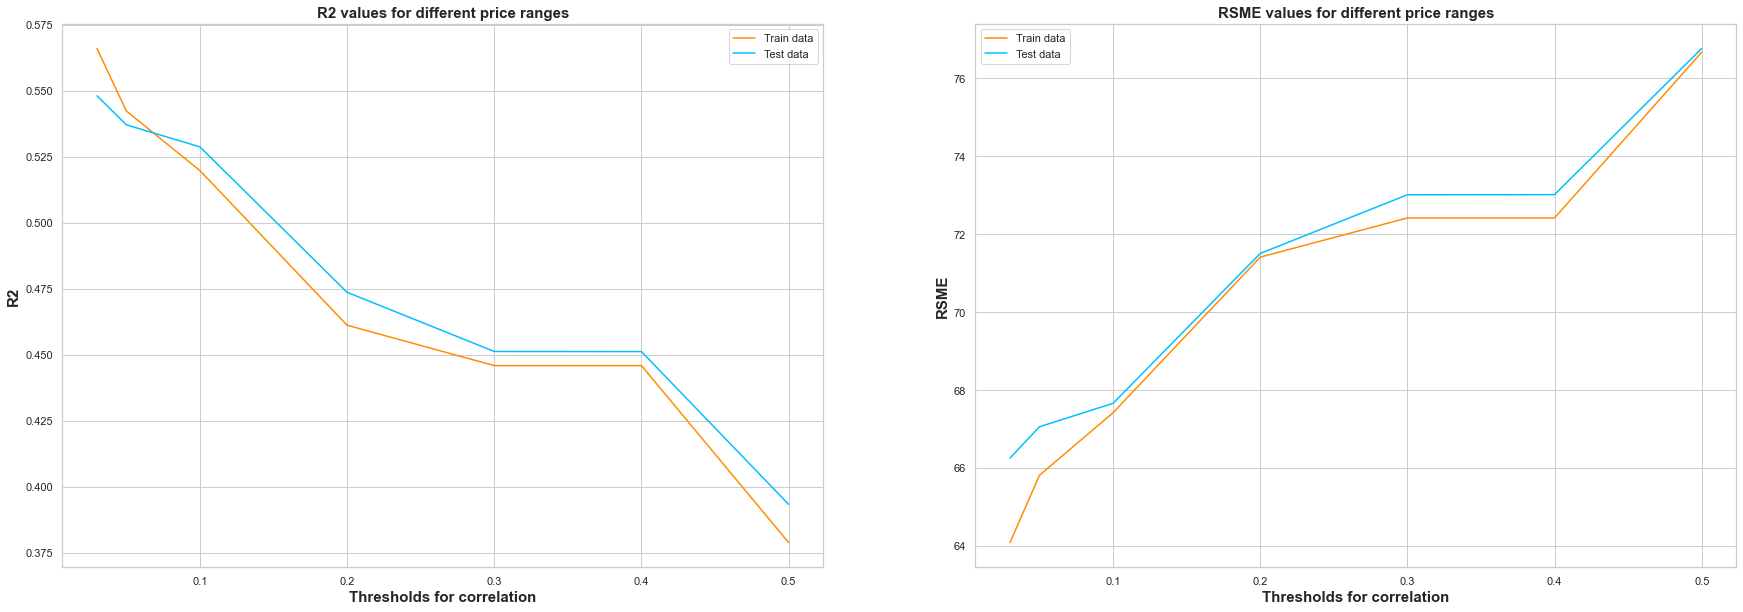

In [77]:
model_performance_correlation_threshold(thresholds)

### Step 5.2: Show model performance for different price ranges

Now we investigate how the price range influences the model performance. I have to note that we *do not compare the performance of one* model in different price ranges. We are building a model for each price range that is also just trained with data of locations that were in this price range.

We see that our models perform best for locations that have an price between 0 and 300 dollars. The reason for this might be that we here have the biggest data basis as there are more locations in this price range than above 300 dollars. Especially looking at the models for locations that cost more than 500 dollars per night we see that our models are overfitting because the performance for the train data is really good while the performance for test data is getting very poor.

In [78]:
price_borders = [100, 200, 300, 400, 500, 600, 700]

In [79]:
def model_performance_by_price_ranges(price_range_borders, df=all_li_clean_encoded, plot=True):
    r2_test_values = []
    r2_train_values = []
    rsme_test_values = []
    rsme_train_values = []
    for border in price_range_borders:
        df_subset = df[(df['price'] <= border) & (df['price'] >= (border - 100))]
        r2_test, r2_train, rsme_test, rsme_train = lm_model(df=df_subset, features=features, target=target, plot=False, print_performance=False)
        r2_test_values.append(r2_test)
        r2_train_values.append(r2_train)
        rsme_test_values.append(rsme_test)
        rsme_train_values.append(rsme_train)

    labels = ['>= 100$', '>= 200$', '>= 300$', '>= 400$', '>= 500$', '>= 600$', '>= 700$']

    if plot is True:
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,10))
        ax1.plot(labels, r2_train_values, color='darkorange', label='Train data')
        ax1.plot(labels, r2_test_values, color='deepskyblue', label='Test data')
        ax1.set_title('R2 values for different price ranges', weight='bold').set_fontsize(15)
        ax1.set_ylabel('R2', weight='bold').set_fontsize(15)
        ax1.set_xlabel('Price range', weight='bold').set_fontsize(15)
        ax1.legend()

        ax2.plot(labels, rsme_train_values, color='darkorange', label='Train data')
        ax2.plot(labels, rsme_test_values, color='deepskyblue', label='Test data')
        ax2.set_title('RSME values for different price ranges', weight='bold').set_fontsize(15)
        ax2.set_ylabel('RSME', weight='bold').set_fontsize(15)
        ax2.set_xlabel('Price range', weight='bold').set_fontsize(15)
        ax2.legend()
        plt.show()

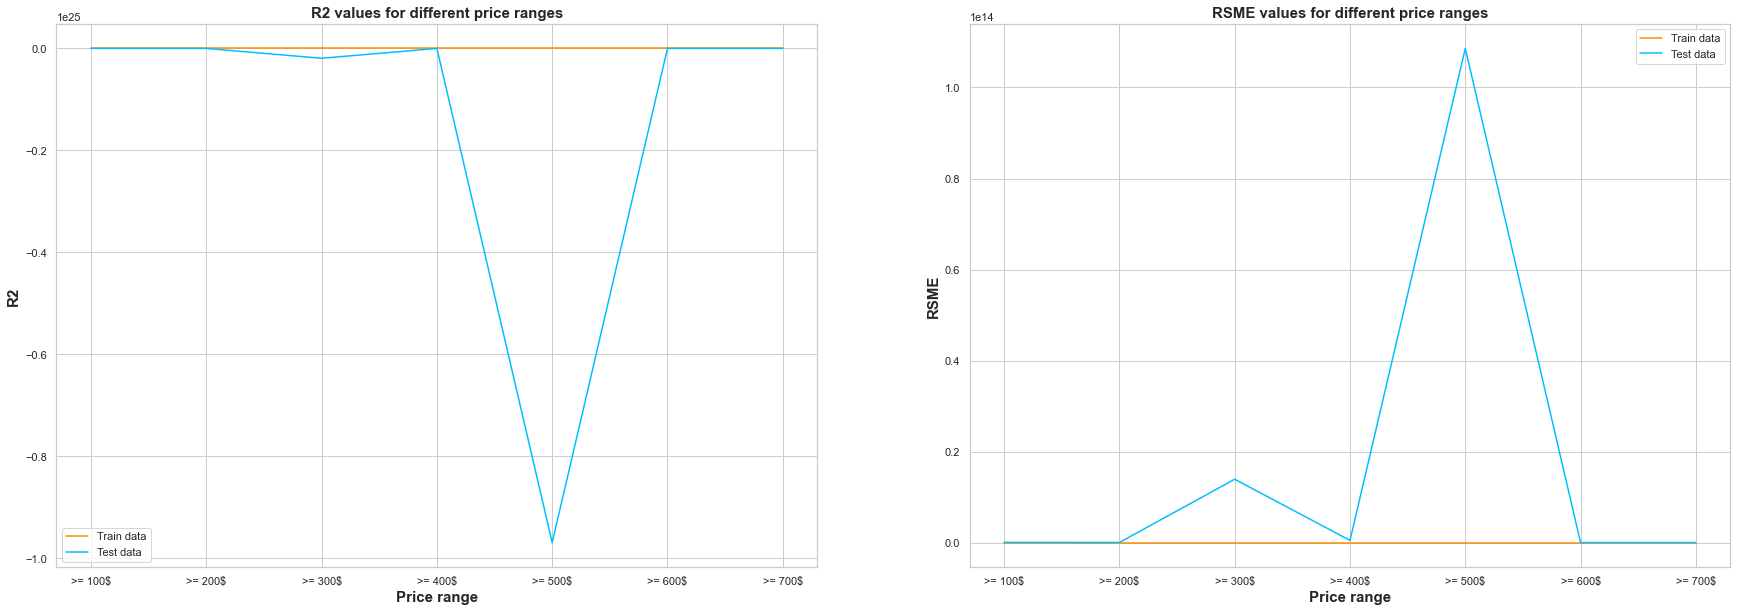

In [80]:
model_performance_by_price_ranges(price_borders)

### Step 5.3: Show model performance for different cities

Finally I want to know if our model performs better if we just use data from locations either in Boston or Seattle. By looking at the RSME and R2 values below we see that there is no improvement in performance if the data just comes from one city. The models even seem to perform slightly worse than the model in section 4.5 that was trained on all the data.

In [81]:
def model_performance_by_city(df=all_li_clean_encoded, plot=True, print_performance=True, boston=True, seattle=True):
    df_boston = df[df['city'] == 'Boston']
    df_seattle = df[df['city'] == 'Seattle']

    # Boston
    if boston is True:
        X_bo = df_boston[features]
        y_bo = df_boston[target]
        X_train_bo, X_test_bo, y_train_bo, y_test_bo = train_test_split(X_bo, y_bo, test_size=0.2, random_state=42)
        linear_model = LinearRegression()
        linear_model.fit(X_train_bo, y_train_bo)
        predicted_test_bo = linear_model.predict(X_test_bo)
        predicted_train_bo = linear_model.predict(X_train_bo)
        r2_test_bo = r2_score(y_test_bo, predicted_test_bo)
        rsme_test_bo = mean_squared_error(y_test_bo, predicted_test_bo, squared=False)
        r2_train_bo = r2_score(y_train_bo, predicted_train_bo)
        rsme_train_bo = mean_squared_error(y_train_bo, predicted_train_bo, squared=False)

        if plot is True:
            fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,10))
            ax1.scatter(y=predicted_test_bo, x=y_test_bo, alpha=0.7, color='deepskyblue')
            ax1.plot(y_test_bo, y_test_bo, color='darkorange')
            ax1.set_title('Performance on test data for listings in Boston', weight='bold').set_fontsize(15)
            ax1.set_ylabel('Predicted prices', weight='bold').set_fontsize(15)
            ax1.set_xlabel('True prices', weight='bold').set_fontsize(15)

            ax2.scatter(y=predicted_train_bo, x=y_train_bo, alpha=0.7, color='deepskyblue')
            ax2.plot(y_test_bo, y_test_bo, color='darkorange')
            ax2.set_title('Performance on train data for listings in Boston', weight='bold').set_fontsize(15)
            ax2.set_ylabel('Predicted prices', weight='bold').set_fontsize(15)
            ax2.set_xlabel('True prices', weight='bold').set_fontsize(15)
            plt.show()

        if print_performance is True:
            print(
                '   R2 test data (Boston): {r2_test} \
                    RSME test data (Boston): {rsme_test} \
                    R2 train data (Boston): {r2_train} \
                    RSME train data (Boston): {rsme_train}'.format(r2_test=r2_test_bo, rsme_test=rsme_test_bo, r2_train=r2_train_bo, rsme_train=rsme_train_bo))
    # Seattle
    if seattle is True:
        X_se = df_seattle[features]
        y_se = df_seattle[target]
        X_train_se, X_test_se, y_train_se, y_test_se = train_test_split(X_se, y_se, test_size=0.2, random_state=42)
        linear_model = LinearRegression()
        linear_model.fit(X_train_se, y_train_se)
        predicted_test_se = linear_model.predict(X_test_se)
        predicted_train_se = linear_model.predict(X_train_se)
        r2_test_se = r2_score(y_test_se, predicted_test_se)
        rsme_test_se = mean_squared_error(y_test_se, predicted_test_se, squared=False)
        r2_train_se = r2_score(y_train_se, predicted_train_se)
        rsme_train_se = mean_squared_error(y_train_se, predicted_train_se, squared=False)

        if plot is True:
            fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,10))
            ax1.scatter(y=predicted_test_se, x=y_test_se, alpha=0.7, color='deepskyblue')
            ax1.plot(y_test_se, y_test_se, color='darkorange')
            ax1.set_title('Performance on test data for listings in Seattle', weight='bold').set_fontsize(15)
            ax1.set_ylabel('Predicted prices', weight='bold').set_fontsize(15)
            ax1.set_xlabel('True prices', weight='bold').set_fontsize(15)

            ax2.scatter(y=predicted_train_se, x=y_train_se, alpha=0.7, color='deepskyblue')
            ax2.plot(y_test_se, y_test_se, color='darkorange')
            ax2.set_title('Performance on train data for listings in Seattle', weight='bold').set_fontsize(15)
            ax2.set_ylabel('Predicted prices', weight='bold').set_fontsize(15)
            ax2.set_xlabel('True prices', weight='bold').set_fontsize(15)
            plt.show()

        if print_performance is True:
            print(
                '   R2 test data (Seattle): {r2_test} \
                    RSME test data (Seattle): {rsme_test} \
                    R2 train data (Seattle): {r2_train} \
                    RSME train data (Seattle): {rsme_train}'.format(r2_test=r2_test_se, rsme_test=rsme_test_se, r2_train=r2_train_se, rsme_train=rsme_train_se))

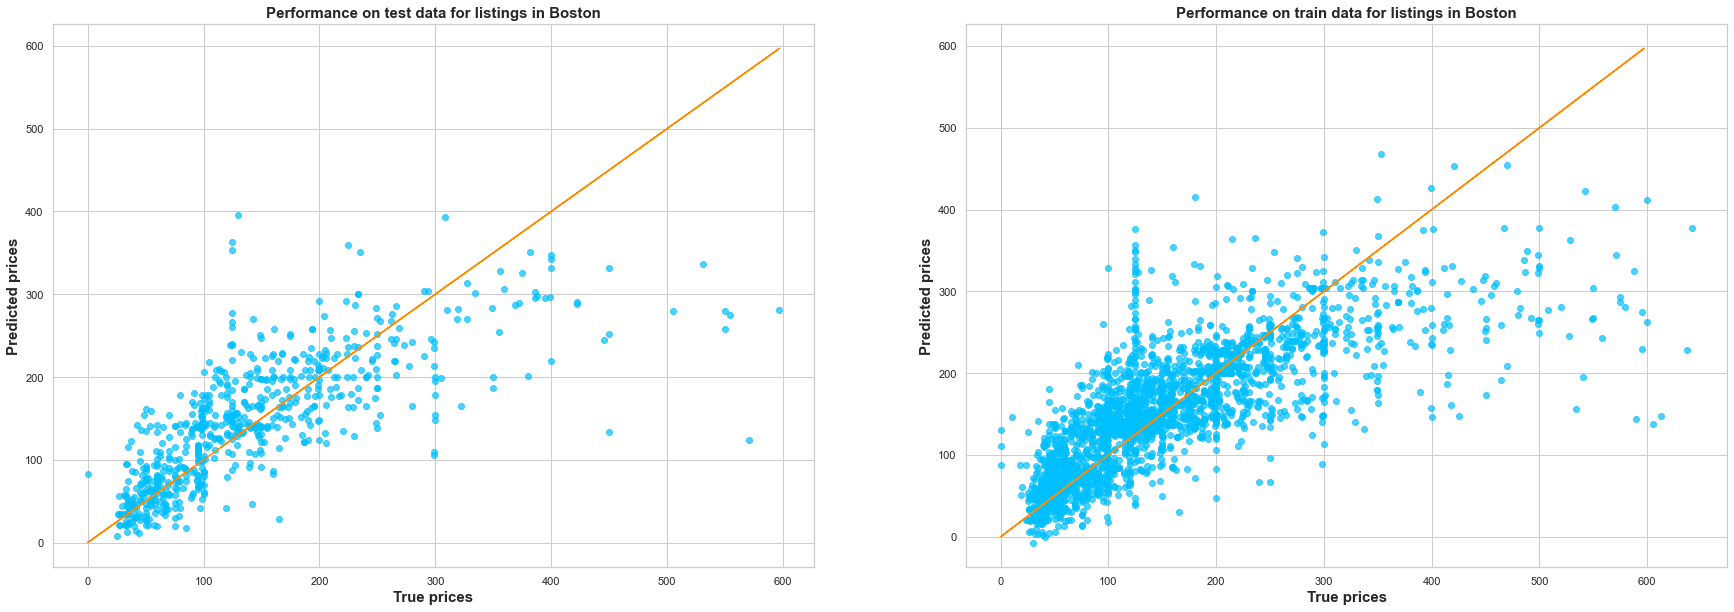

   R2 test data (Boston): 0.5752952848283486                     RSME test data (Boston): 62.930047558712104                     R2 train data (Boston): 0.5867367213511059                     RSME train data (Boston): 64.58318551683647


In [82]:
model_performance_by_city(seattle=False)

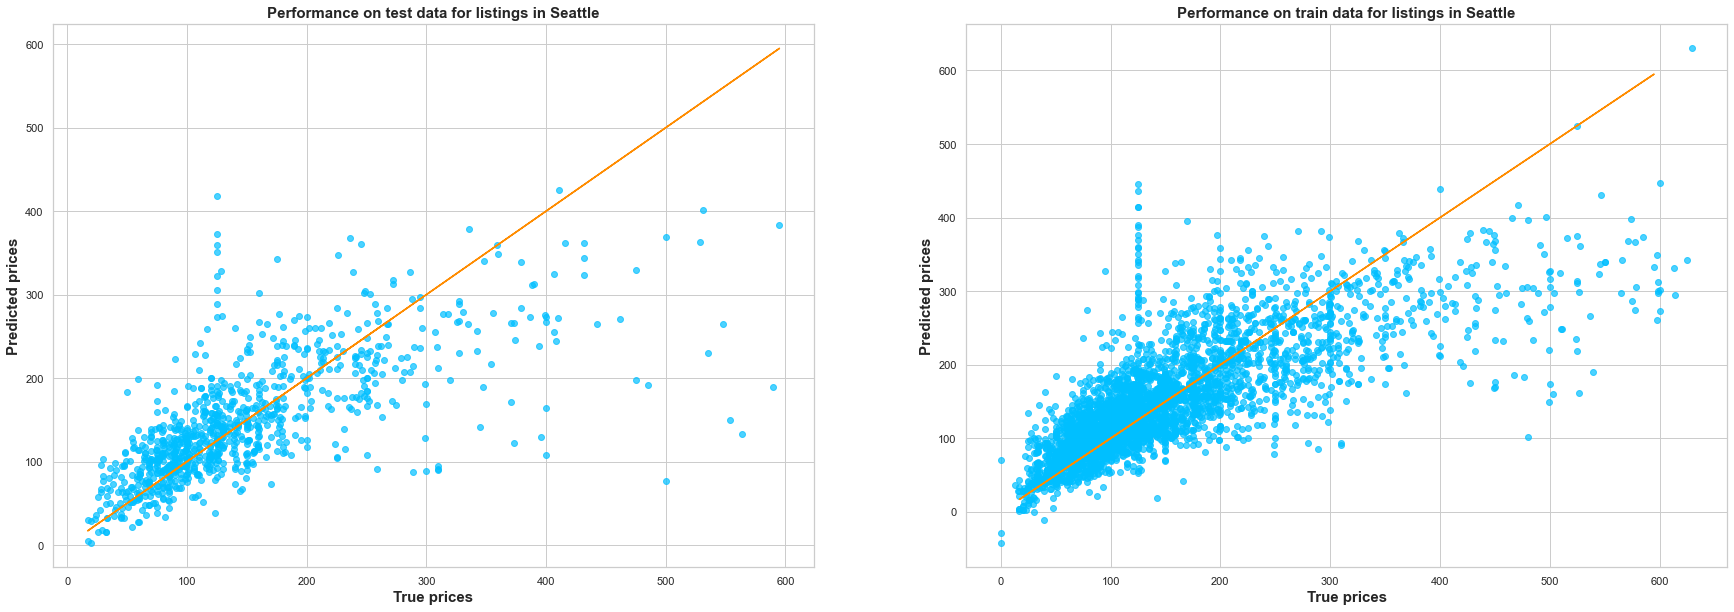

   R2 test data (Seattle): 0.48785164922587876                     RSME test data (Seattle): 67.07012876423431                     R2 train data (Seattle): 0.5921334054439154                     RSME train data (Seattle): 61.78078686238482


In [83]:
model_performance_by_city(boston=False)

## Conclusion

In this workbook we used data from AirBnB locations to answer several research questions. For the research questions regarding the price we were able to give some clear answers by using the cleaned data. However for the questions regarding the review score there seemed to be no clear correlation between the review score and the columns I chose at the beginning of the project. An possibility to extend the project might be to search for columns that have a higher influence on the review score. Maybe - using those columns - we can even build a prediction model for the review score of a AirBnB location.

We also built a prediction model for the price of a location using a simple Linear Regression approach. To prepare our data we first had to clean it and then we used some other techniques like One-Hot-Encoding to prepare our data for training the model. Even though the Linear Regression approach is rather simple we were able to reach some mediocre values for both R2 (best was 0.55 for the test data) and RSME (best was 66.3 for the test data).